# EDA

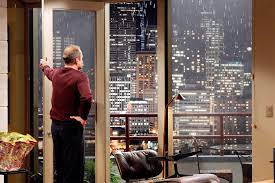

In [1]:
import warnings
warnings.filterwarnings("ignore")

# Essential Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import missingno as msno
from IPython.display import Image
import sidetable as stb


# Set Visualization Style
plt.rcParams.update({"figure.figsize": (10, 6), "axes.facecolor": "white", "axes.edgecolor": "black"})
plt.rcParams["figure.facecolor"] = "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
# Load Dataset
house_price = pd.read_csv('dataset.csv')
house_price_cp = house_price.copy()

In [3]:
# Display Basic Information
print("Dataset Overview:")
print("Total Rows and Columns:", house_price.shape)
print("List of columns in the dataset:")
print(house_price.columns.tolist())


Dataset Overview:
Total Rows and Columns: (21597, 21)
List of columns in the dataset:
['id', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'date', 'price']


## Column Definitions - King County, WA Housing Dataset

| Column Name | Definition |
|-------------|------------|
| **id** | Unique identifier for each house. |
| **bedrooms** | Number of bedrooms in the house. |
| **bathrooms** | Number of bathrooms in the house (can be fractional, e.g., 2.5 means 2 full bathrooms + 1 half bathroom). |
| **sqft_living** | Square footage of the interior living space. |
| **sqft_lot** | Square footage of the lot (land area). |
| **floors** | Total number of floors in the house (including basements). |
| **waterfront** | Whether the house has a waterfront view (`1` = Yes, `0` = No). |
| **view** | Rating of the quality of the view (0-4), with higher values indicating better views. |
| **condition** | Overall condition of the house (1-5), where `1` = Poor, `3` = Average, and `5` = Very Good. |
| **grade** | Construction quality of the house (1-13), where `1-3` = Low quality, `7` = Average, `10+` = Luxury homes. |
| **sqft_above** | Square footage of the house excluding the basement. |
| **sqft_basement** | Square footage of the basement (if any). |
| **yr_built** | Year the house was originally built. |
| **yr_renovated** | Year the house was last renovated (`0` if never renovated). |
| **zipcode** | Zip code of the house location. |
| **lat** | Latitude coordinate of the house. |
| **long** | Longitude coordinate of the house. |
| **sqft_living15** | Average square footage of interior living space for the 15 nearest neighbors. |
| **sqft_lot15** | Average square footage of the lot for the 15 nearest neighbors. |
| **date** | Date when the house was sold (YYYY-MM-DD). |
| **price** | Final selling price of the house in USD (target variable). |


In [4]:
# Display First Few Rows
print("\nSample Data:")
print(house_price.head(3))


Sample Data:
           id  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0  7129300520     3.000      1.000     1180.000  5650.000   1.000         NaN   
1  6414100192     3.000      2.250     2570.000  7242.000   2.000       0.000   
2  5631500400     2.000      1.000      770.000 10000.000   1.000       0.000   

   view  condition  grade  ...  sqft_basement  yr_built  yr_renovated  \
0 0.000          3      7  ...          0.000      1955         0.000   
1 0.000          3      7  ...        400.000      1951     19910.000   
2 0.000          3      6  ...          0.000      1933           NaN   

   zipcode    lat     long  sqft_living15  sqft_lot15        date      price  
0    98178 47.511 -122.257       1340.000    5650.000  2014-10-13 221900.000  
1    98125 47.721 -122.319       1690.000    7639.000  2014-12-09 538000.000  
2    98028 47.738 -122.233       2720.000    8062.000  2015-02-25 180000.000  

[3 rows x 21 columns]


In [5]:
#Check information
print("\nInformation  Summary:")
print(house_price.info())


Information  Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   bedrooms       21597 non-null  float64
 2   bathrooms      21597 non-null  float64
 3   sqft_living    21597 non-null  float64
 4   sqft_lot       21597 non-null  float64
 5   floors         21597 non-null  float64
 6   waterfront     19206 non-null  float64
 7   view           21534 non-null  float64
 8   condition      21597 non-null  int64  
 9   grade          21597 non-null  int64  
 10  sqft_above     21597 non-null  float64
 11  sqft_basement  21145 non-null  float64
 12  yr_built       21597 non-null  int64  
 13  yr_renovated   17749 non-null  float64
 14  zipcode        21597 non-null  int64  
 15  lat            21597 non-null  float64
 16  long           21597 non-null  float64
 17  sqft_living15  21597 non-nu

In [6]:
#Check duplicate values
print("\nDuplicate values Summary:")
print(house_price.duplicated().sum())



Duplicate values Summary:
0


In [7]:
# Check for Missing Values
print("\nMissing Values Summary:")
print(house_price.isna().sum())



Missing Values Summary:
id                  0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2391
view               63
condition           0
grade               0
sqft_above          0
sqft_basement     452
yr_built            0
yr_renovated     3848
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
date                0
price               0
dtype: int64


In [8]:
print("Missing Values Summary:")
print(f"Number of rows : {house_price.shape[0]}")
print(f"Missing values in view : {round(house_price['view'].isna().sum() / house_price.shape[0] * 100, 2)} %")
print(f"Missing values in yr_renovated : {round(house_price['yr_renovated'].isna().sum() / house_price.shape[0] * 100, 2)} %")
print(f"Missing values in sqft_basement : {round(house_price['sqft_basement'].isna().sum() / house_price.shape[0] * 100, 2)} %")
print(f"Missing values in waterfront : {round(house_price['waterfront'].isna().sum() / house_price.shape[0] * 100, 2)} %")
print(f"Total missing values in DataFrame : {round(house_price.isna().sum().sum() / (house_price.shape[0] * house_price.shape[1]) * 100, 2)} %")


Missing Values Summary:
Number of rows : 21597
Missing values in view : 0.29 %
Missing values in yr_renovated : 17.82 %
Missing values in sqft_basement : 2.09 %
Missing values in waterfront : 11.07 %
Total missing values in DataFrame : 1.49 %


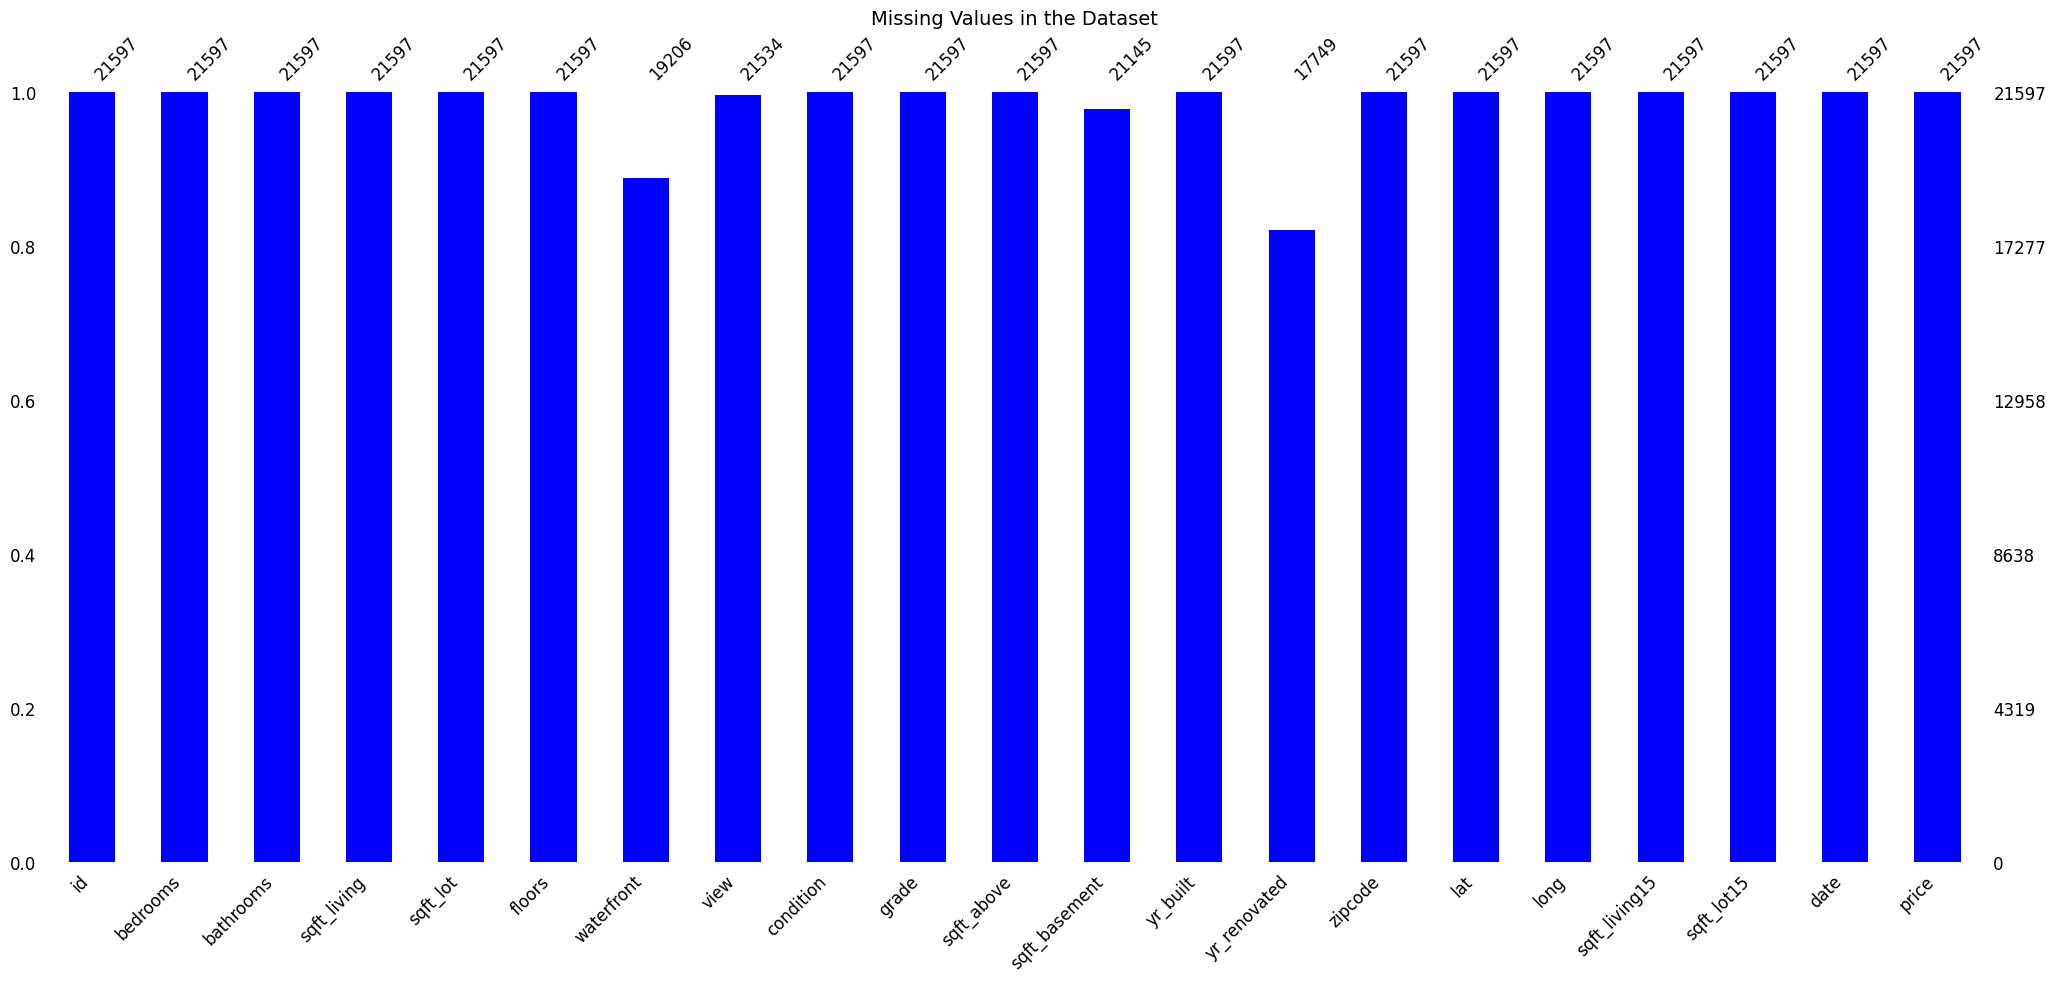

In [9]:
# Visualize Missing Values
plt.figure(figsize=(10,5))
msno.bar(house_price, color='blue', fontsize=12)
plt.title("Missing Values in the Dataset", fontsize=14)
plt.show()

<Figure size 1000x500 with 0 Axes>

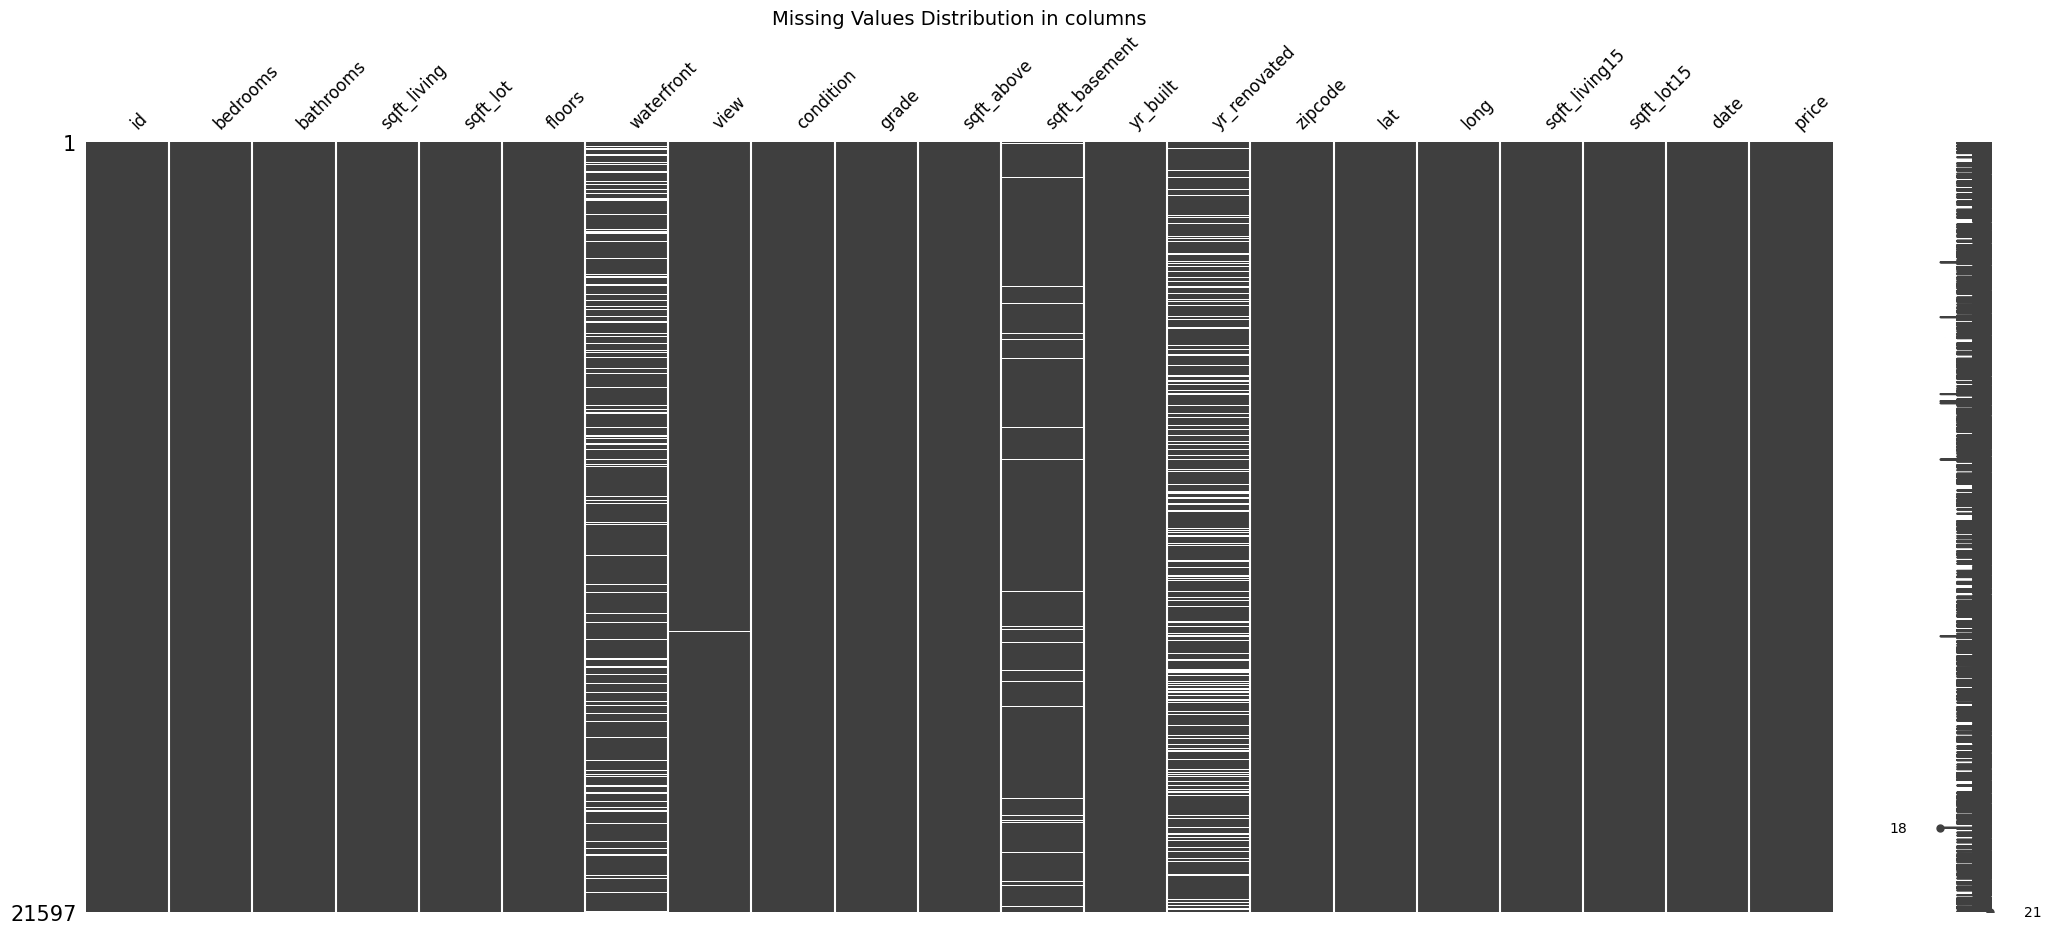

In [10]:
# Visualize Missing Values
plt.figure(figsize=(10,5))
msno.matrix(house_price,color='0.25', fontsize=12)
plt.title("Missing Values Distribution in columns", fontsize=14)
plt.show()

In [11]:
# Display Summary Statistics
print("\nBasic Statistics:")
print(house_price.describe())


Basic Statistics:
                  id  bedrooms  bathrooms  sqft_living    sqft_lot    floors  \
count      21597.000 21597.000  21597.000    21597.000   21597.000 21597.000   
mean  4580474287.771     3.373      2.116     2080.322   15099.409     1.494   
std   2876735715.748     0.926      0.769      918.106   41412.637     0.540   
min      1000102.000     1.000      0.500      370.000     520.000     1.000   
25%   2123049175.000     3.000      1.750     1430.000    5040.000     1.000   
50%   3904930410.000     3.000      2.250     1910.000    7618.000     1.500   
75%   7308900490.000     4.000      2.500     2550.000   10685.000     2.000   
max   9900000190.000    33.000      8.000    13540.000 1651359.000     3.500   

       waterfront      view  condition     grade  sqft_above  sqft_basement  \
count   19206.000 21534.000  21597.000 21597.000   21597.000      21145.000   
mean        0.008     0.234      3.410     7.658    1788.597        291.857   
std         0.087     0

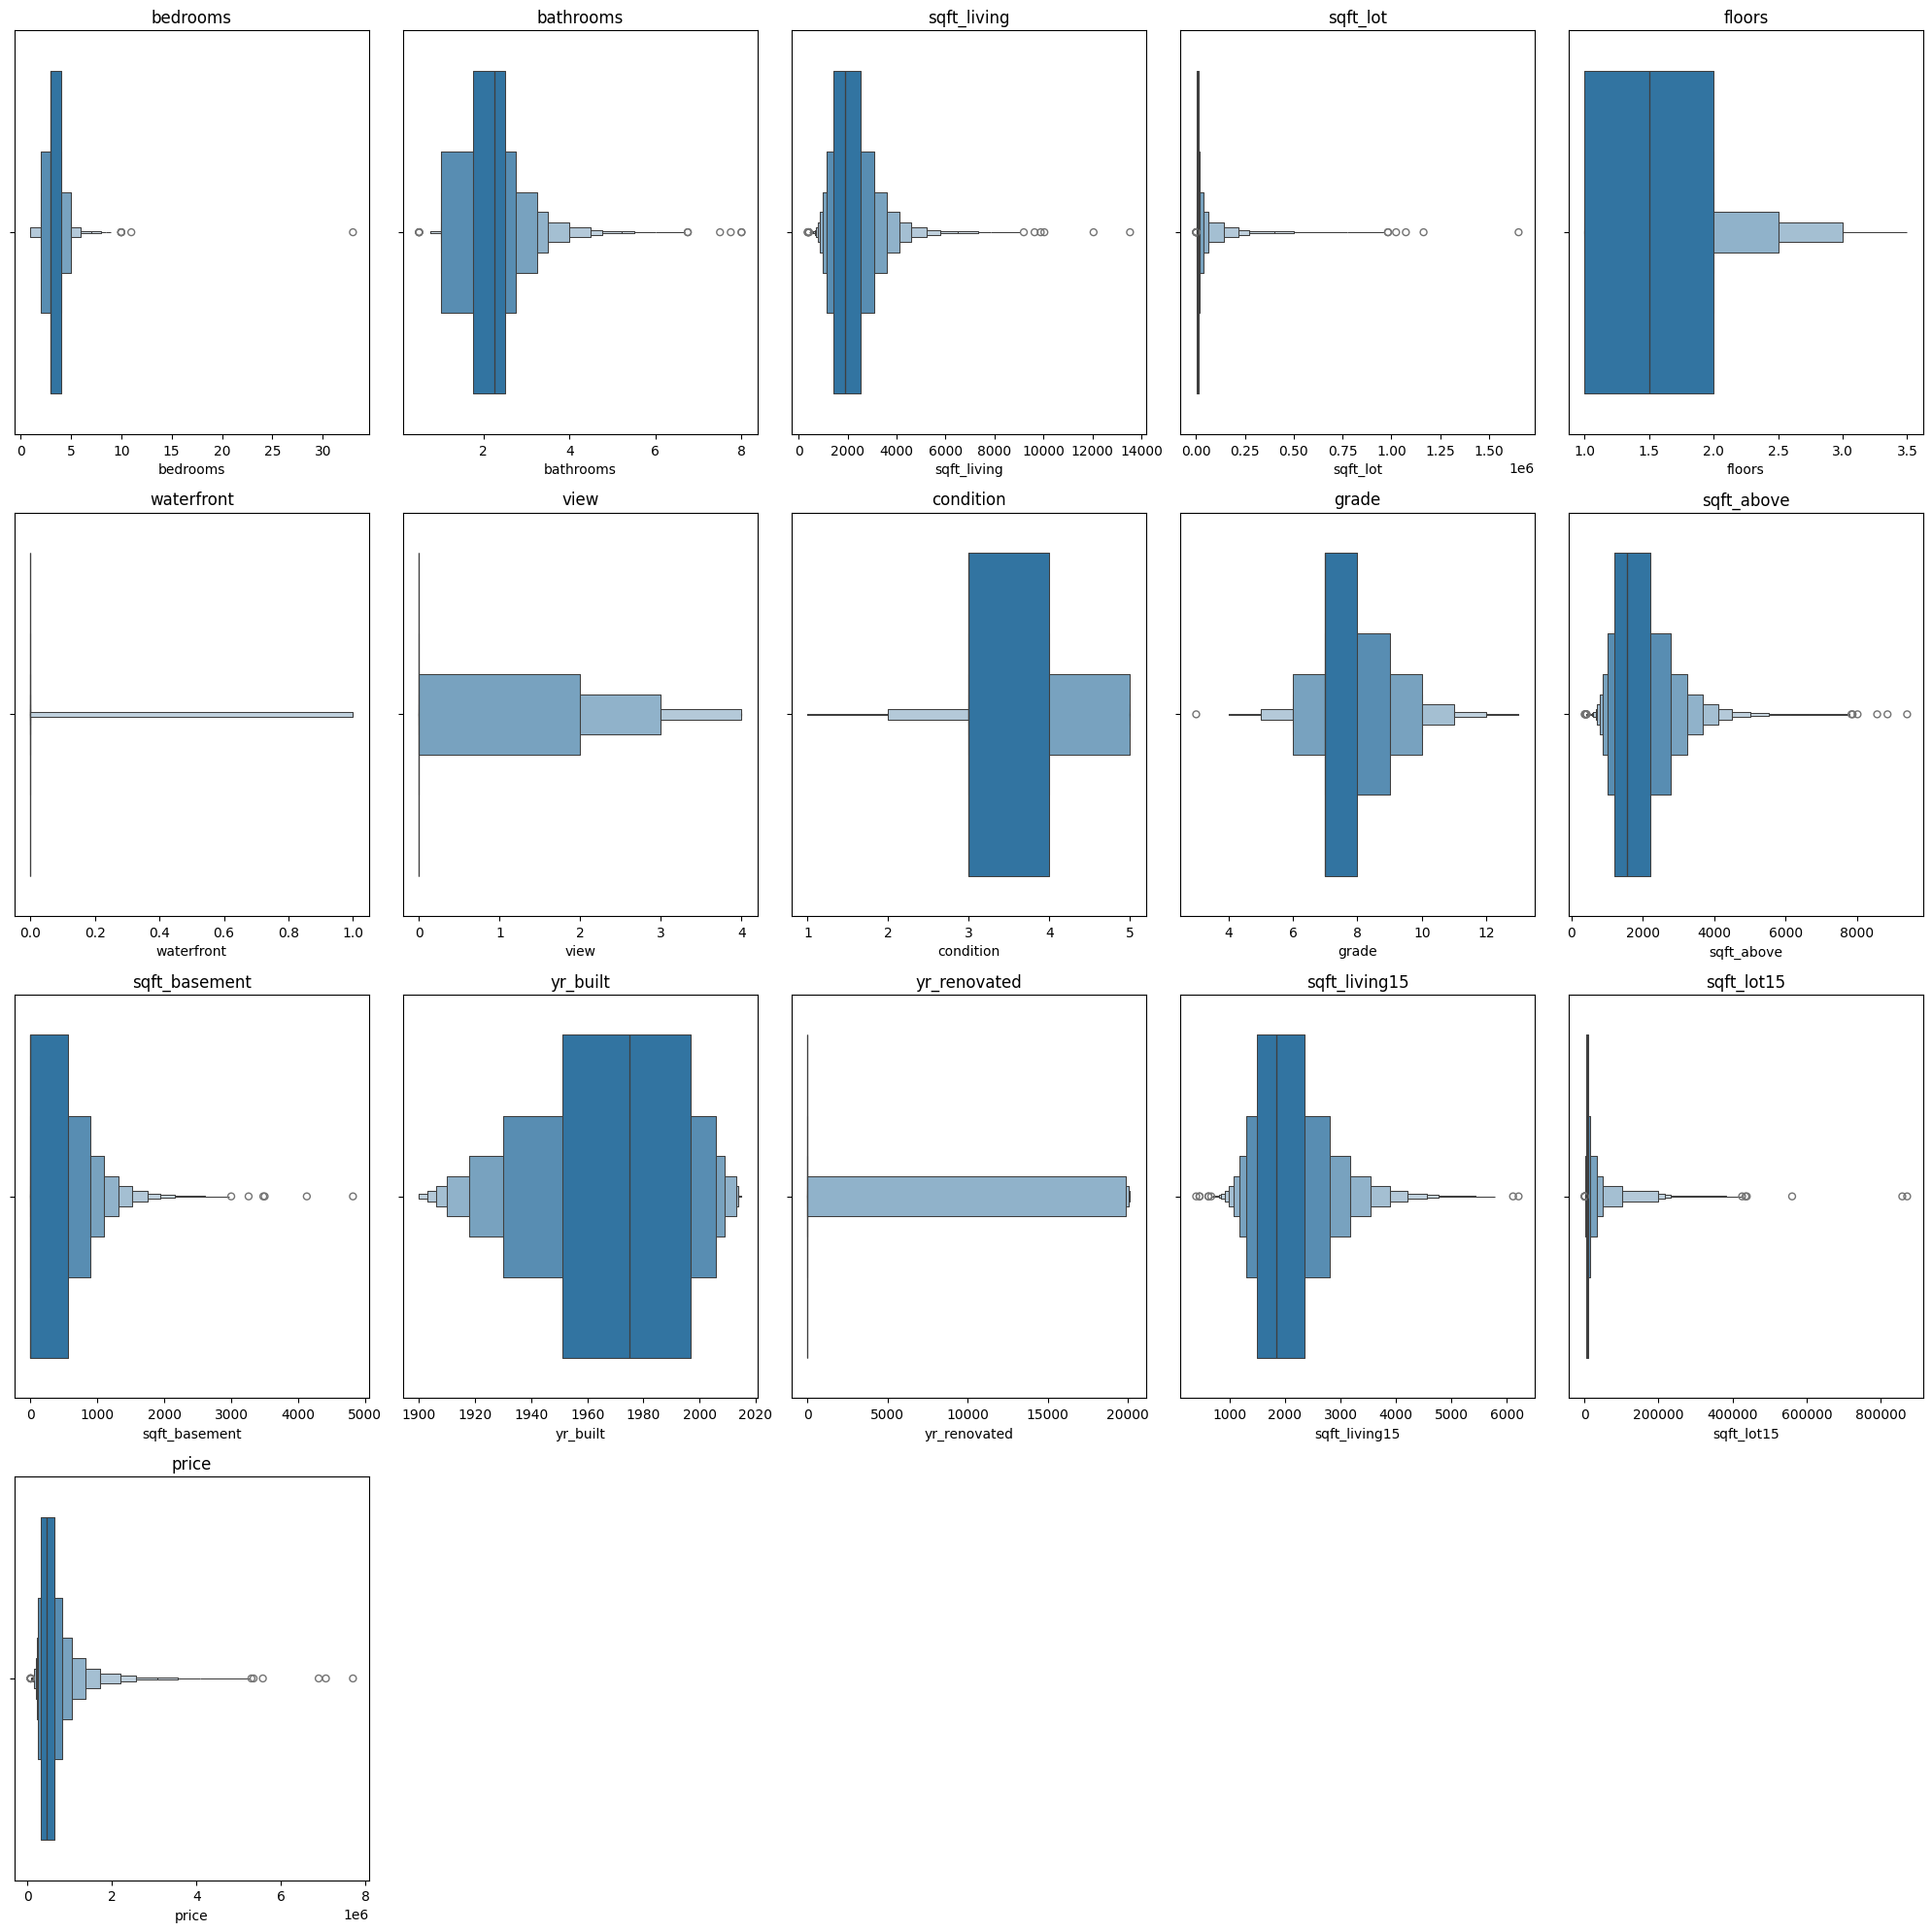

In [12]:
# Drop unnecessary columns before visualization
# Excluding 'id', 'date', 'lat', 'long', and 'zipcode'
house_price_describe = house_price.drop(columns=['id', 'date', 'lat', 'long', 'zipcode'])

# Set figure size for better visualization
plt.figure(figsize=(20, 20))

# Initialize subplot index
x = 1 

# Loop through each numerical column to create individual boxen plots
for column in house_price_describe.columns:
    plt.subplot(4, 5, x)  # Create a subplot in a 4x5 grid
    sns.boxenplot(x=house_price_describe[column])  # Generate boxen plot for each column
    plt.title(column)  # Add title to each subplot
    x += 1  # Increment subplot index

# Adjust layout for better spacing
plt.tight_layout()

# Display the plots
plt.show()


# Result of Basic Statistics:
- Data Issues: Some columns have outliers.
- House Trends: Most homes have 3-4 beds, 2-3 baths, and ~2000 sqft. Few have renovations, and most were built pre-2000.
- Price & Size Skew: Prices range from $540K (avg) to $7.7M (max), with a few high-end properties skewing the data. Larger homes and land sizes also follow this trend.

In [13]:
# Plot houses on a map with color representing price levels
fig = px.scatter_mapbox(
    house_price, # Main data frame
    lat="lat",  # Latitude coordinates for plotting house locations
    lon="long",  # Longitude coordinates for plotting house locations
    color="price",  # Use price to color-code houses, highlighting price variations
    mapbox_style="open-street-map",  # Use OpenStreetMap as the background map
    title="House Locations by Price"  # Set a descriptive title for the plot
)

# Display the interactive map
fig.show()

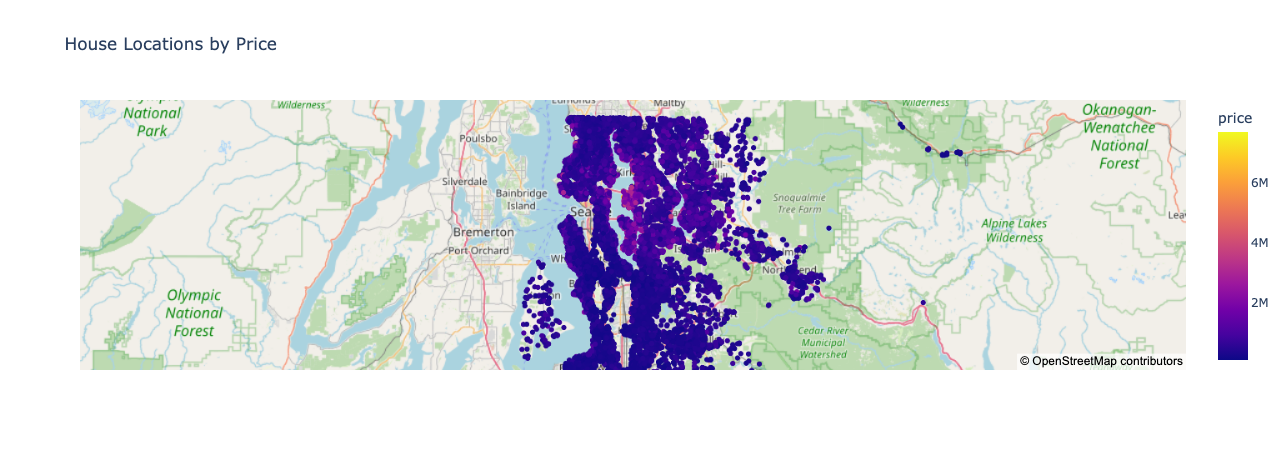

In [14]:
# Display image
Image("Map01.png")

## Client Information and Requirements
- My Client is Nicole Johnson, A buyer who is looking for Lively, central neighborhood, middle price range, right timing (within a year)

## Research Questions, Hypotheses & Indicators

| #  | Research Question | Hypothesis | Indicators |
|----|------------------|------------|------------|
| 1️⃣ | Does property size in central neighborhoods impact affordability? | Smaller properties in central neighborhoods tend to be more affordable than larger ones. | `sqft_living`, `zipcode`, `unit_price_sqft` |
| 2️⃣ | Does the timing of purchase affect house prices? | House prices fluctuate seasonally, with peaks and dips depending on the time of year. | `date`, `month`, `unit_price_sqft` |
| 3️⃣ | How do condition and grade affect house prices? | Houses in better condition and with a higher grade classification are generally more expensive. | `condition`, `grade`, `unit_price_sqft` |


# Feature Engineering For EDA

Feature engineering is a crucial step in Exploratory Data Analysis (EDA) to extract meaningful insights from raw data. The following new features will be created to enhance our understanding of house prices:

- **Location** → Create a new column `location` to indicate whether a house is in a central neighborhood or not.
- **Unit Price per Square Foot** → Compute `unit_price_sqft`, representing the price per square foot of the house.
- **Year and Month** → Extract `year_month` from the `date` column to capture seasonal trends in house sales.
- **House Age** → Compute `house_age`, representing the number of years since the house was built.
- **House Size Group** → Categorize `sqft_living` into groups (`Small`, `Medium-Small`, `Medium`, `Medium-Big`, `Big`) for better comparison.

In [15]:
# Convert the 'date' column to datetime format and extract only the date part (YYYY-MM-DD)
house_price["date"] = pd.to_datetime(house_price["date"]).dt.date

# Extract the year and month from the 'date' column to capture seasonal trends
house_price["year-month"] = house_price["date"].astype(str).str[:7]  # Extracts YYYY-MM format as a string

# Extract only the month from the 'date' column to analyze monthly trends
house_price["month"] = pd.to_datetime(house_price["date"]).dt.month

In [16]:
# Categorize houses into five size groups based on square footage
house_price["sqft_living_group"] = pd.qcut(house_price["sqft_living"], 5, 
                                            labels=["Small", "Medium-Small", "Medium", "Medium-Big", "Big"])

# Display the newly created house size category column
house_price["sqft_living_group"]

# Define bin edges based on requested categories
bins = [0, 1000, 2000, 3000, 4000, 5000, float("inf")]
labels = ["sqft<1000", "1001<sqft<2000", "2001<sqft<3000", 
          "3001<sqft<4000", "4001<sqft<5000", "5001<sqft"]

# Apply binning to create house size groups
house_price["house_size_group"] = pd.cut(house_price["sqft_living"], bins=bins, labels=labels, include_lowest=True)

# Count the number of houses in each group
house_size_distribution = house_price["house_size_group"].value_counts().sort_index()

house_size_distribution


house_size_group
sqft<1000          1487
1001<sqft<2000    10213
2001<sqft<3000     6817
3001<sqft<4000     2298
4001<sqft<5000      571
5001<sqft           211
Name: count, dtype: int64

In [17]:
# Calculate house age based on the year built
house_price['age'] = 2024 - house_price['yr_built']  # Assuming the current year is 2024

# Categorize houses into age groups
house_price['house_age'] = pd.qcut(house_price['age'], 5, 
                                   labels=["Newly Built", "20-30 Years Old", "30-40 Years Old", "40-50 Years Old", "50+ Years Old"])

# Categorize houses into age groups using pd.cut with specified bins
bins = [0, 20, 30, 40, 50, float('inf')]
labels = ["0-20 Years", "21-30 Years", "31-40 Years", "41-50 Years", "51+ Years"]
house_price['house_age_group'] = pd.cut(house_price['age'], bins=bins, labels=labels, right=False)


# Calculate unit price per square foot to standardize price comparisons
house_price['unit_price_sqft'] = house_price['price'] / house_price['sqft_living']

house_price['age'].value_counts() 

age
10     559
18     453
19     450
20     433
21     420
      ... 
91      30
123     29
122     27
89      24
90      21
Name: count, Length: 116, dtype: int64

In [18]:
# Define a list of central neighborhoods and their characteristics
lively_area_lst = [
    {"location": "City_Center_Area", "zipcode": 98101, "city": "Seattle", "neighborhood": "Downtown Seattle"},
    {"location": "City_Center_Area", "zipcode": 98121, "city": "Seattle", "neighborhood": "Belltown"},
    {"location": "City_Center_Area", "zipcode": 98109, "city": "Seattle", "neighborhood": "South Lake Union"},
    {"location": "City_Center_Area", "zipcode": 98102, "city": "Seattle", "neighborhood": "Capitol Hill"},
    {"location": "City_Center_Area", "zipcode": 98112, "city": "Seattle", "neighborhood": "Capitol Hill (East)"},
    {"location": "City_Center_Area", "zipcode": 98122, "city": "Seattle", "neighborhood": "Capitol Hill (South)"},
    {"location": "City_Center_Area", "zipcode": 98107, "city": "Seattle", "neighborhood": "Ballard"},
    {"location": "City_Center_Area", "zipcode": 98103, "city": "Seattle", "neighborhood": "Fremont"},
    {"location": "City_Center_Area", "zipcode": 98119, "city": "Seattle", "neighborhood": "Queen Anne"},
    {"location": "City_Center_Area", "zipcode": 98105, "city": "Seattle", "neighborhood": "University District"},
    {"location": "City_Center_Area", "zipcode": 98108, "city": "Seattle", "neighborhood": "Georgetown"},
    {"location": "City_Center_Area", "zipcode": 98118, "city": "Seattle", "neighborhood": "Columbia City"}
]

# Convert the list of dictionaries into a DataFrame
lively_area = pd.DataFrame(lively_area_lst)

# Display information about the DataFrame to verify the structure
lively_area.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   location      12 non-null     object
 1   zipcode       12 non-null     int64 
 2   city          12 non-null     object
 3   neighborhood  12 non-null     object
dtypes: int64(1), object(3)
memory usage: 516.0+ bytes


In [19]:
# Merge the lively_area DataFrame with the house_price DataFrame on the 'zipcode' column
# This will add location information to the house dataset
house_price = pd.merge(house_price, lively_area, on="zipcode", how="left")

# Display the updated column names to verify successful merge
house_price.columns

Index(['id', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'date', 'price', 'year-month', 'month',
       'sqft_living_group', 'house_size_group', 'age', 'house_age',
       'house_age_group', 'unit_price_sqft', 'location', 'city',
       'neighborhood'],
      dtype='object')

In [20]:
# Missing values Summary after merging:
house_price.isna().sum()

id                       0
bedrooms                 0
bathrooms                0
sqft_living              0
sqft_lot                 0
floors                   0
waterfront            2391
view                    63
condition                0
grade                    0
sqft_above               0
sqft_basement          452
yr_built                 0
yr_renovated          3848
zipcode                  0
lat                      0
long                     0
sqft_living15            0
sqft_lot15               0
date                     0
price                    0
year-month               0
month                    0
sqft_living_group        0
house_size_group         0
age                      0
house_age                0
house_age_group          0
unit_price_sqft          0
location             18851
city                 18851
neighborhood         18851
dtype: int64

In [21]:
# Fill missing values for location-related columns with default values
# - If a house is not in a recognized city center, it will be labeled as 'Non_City_Center_Area'
# - Unknown neighborhoods and characteristics will be labeled as 'Unknown'
# - The city column will also be labeled as 'Unknown' for missing values
house_price.fillna({"location": "Non_City_Center_Area",
                    "neighborhood": "Unknown",
                    "city": "Unknown"}, inplace=True)


In [22]:
# Filter properties located in the city center
city_center_house = house_price[house_price["location"] == "City_Center_Area"]

# Filter properties located outside the city center
non_center_house = house_price[house_price["location"] == "Non_City_Center_Area"]

In [23]:
# Missing values in city center area Data frame Summary:
print("Missing values in city center area Data frame Summery:")
print(f"Number of rows : {city_center_house.shape[0]}")
print(f"Missing values in view : {round(city_center_house['view'].isna().sum() / city_center_house.shape[0] * 100, 2)} %")
print(f"Missing values in yr_renovated : {round(city_center_house['yr_renovated'].isna().sum() / city_center_house.shape[0] * 100, 2)} %")
print(f"Missing values in sqft_basement : {round(city_center_house['sqft_basement'].isna().sum() / city_center_house.shape[0] * 100, 2)} %")
print(f"Missing values in waterfront : {round(city_center_house['waterfront'].isna().sum() / city_center_house.shape[0] * 100, 2)} %")
print(f"Total missing values in DataFrame : {round(city_center_house.isna().sum().sum() / (city_center_house.shape[0] * city_center_house.shape[1]) * 100, 2)} %")


Missing values in city center area Data frame Summery:
Number of rows : 2746
Missing values in view : 0.18 %
Missing values in yr_renovated : 18.43 %
Missing values in sqft_basement : 2.29 %
Missing values in waterfront : 10.49 %
Total missing values in DataFrame : 0.98 %


## EDA
# Univariate Analysis


In [24]:
house_price.columns

Index(['id', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'date', 'price', 'year-month', 'month',
       'sqft_living_group', 'house_size_group', 'age', 'house_age',
       'house_age_group', 'unit_price_sqft', 'location', 'city',
       'neighborhood'],
      dtype='object')

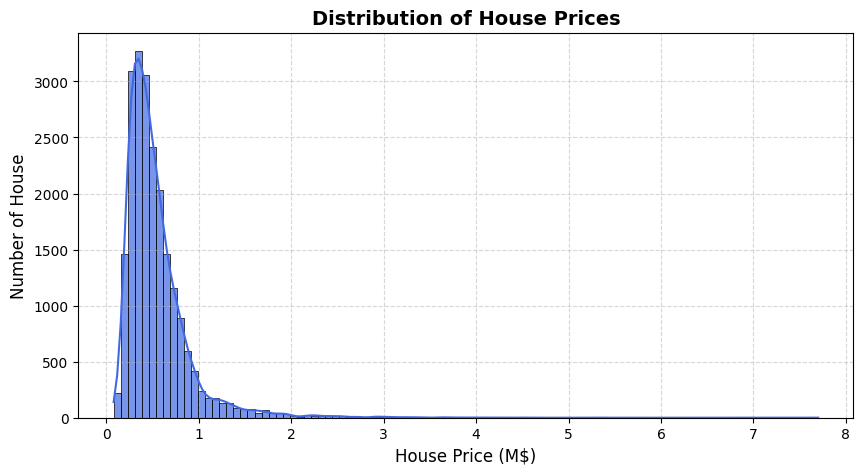

In [25]:
# Price Distribution Analysis
# Univariate analysis to understand the spread and shape of house prices in the dataset

# Set figure size for better visualization
plt.figure(figsize=(10, 5))

# Create a histogram with KDE (Kernel Density Estimate) for a smooth distribution curve
sns.histplot(house_price['price']/1000000, kde=True, bins=100, color="royalblue", alpha=0.7)

# Add axis labels and title for context
plt.xlabel("House Price (M$)", fontsize=12)  # X-axis label representing house prices
plt.ylabel("Number of House", fontsize=12)  # Y-axis label representing the count of houses in each price range
plt.title("Distribution of House Prices", fontsize=14, fontweight="bold")  # Title of the plot

# Add a grid to enhance readability
plt.grid(True, linestyle="--", alpha=0.5)

# Display the plot
plt.show()


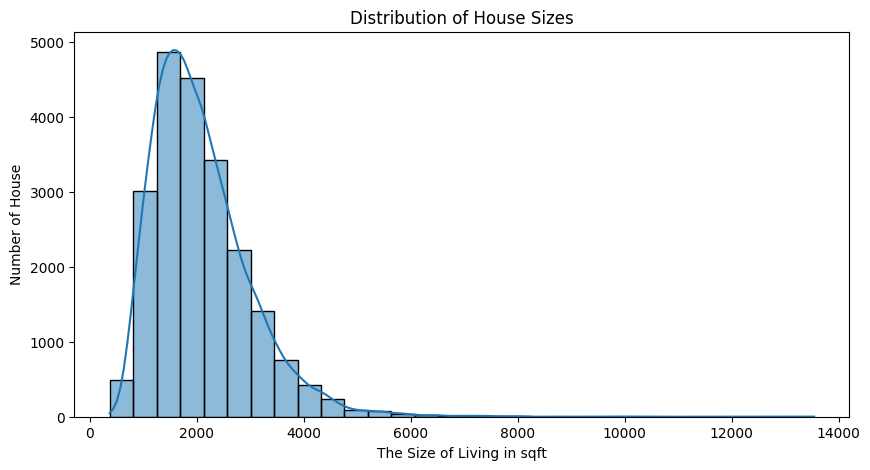

In [26]:
# House Size Distribution
# Plot a histogram to visualize the distribution of house sizes
plt.figure(figsize=(10, 5))  # Set figure size for better readability

# Histogram with KDE (Kernel Density Estimation) to show the distribution of house sizes
sns.histplot(house_price["sqft_living"], bins=30, kde=True)  

# labels and title 
plt.xlabel("The Size of Living in sqft")  # X-axis label representing the living area in square feet
plt.ylabel("Number of House")  # Y-axis label representing the number of houses in each bin
plt.title("Distribution of House Sizes")  # Title of the histogram

# Show the histogram plot
plt.show()

Bedrooms Distribution: 
 bedrooms
3.000    0.455
4.000    0.319
2.000    0.128
5.000    0.074
6.000    0.013
1.000    0.009
7.000    0.002
8.000    0.001
9.000    0.000
10.000   0.000
11.000   0.000
33.000   0.000
Name: proportion, dtype: float64


<Axes: xlabel='bedrooms', ylabel='count'>

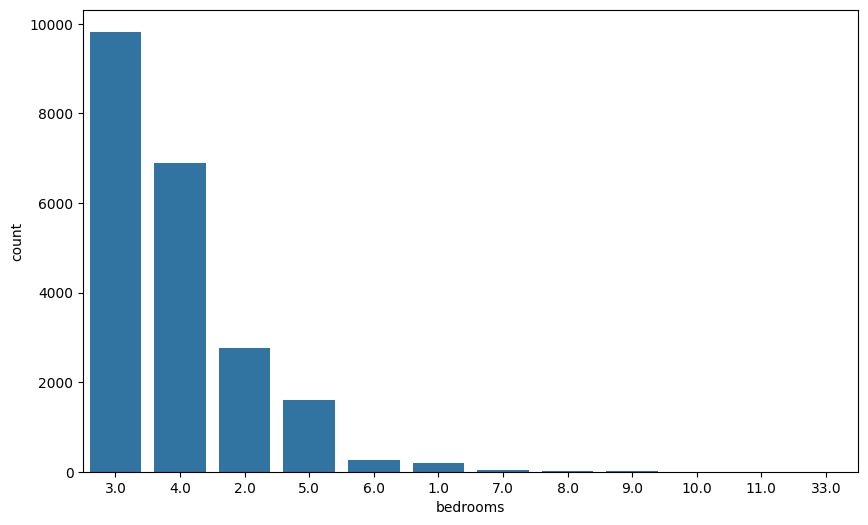

In [27]:
#Calculate the proportion of houses by number of bedrooms
print("Bedrooms Distribution: \n",house_price['bedrooms'].value_counts(normalize=True))

# - Almost 50% of the houses have 3 bedrooms.

# Create a count plot to visualize the frequency of different bedroom counts
sns.countplot(data=house_price, x="bedrooms", 
              order=house_price['bedrooms'].value_counts().index[:20])


Bathrooms Distribution: 
 bathrooms
2.500   0.249
1.000   0.178
1.750   0.141
2.250   0.095
2.000   0.089
1.500   0.067
2.750   0.055
3.000   0.035
3.500   0.034
3.250   0.027
3.750   0.007
4.000   0.006
4.500   0.005
4.250   0.004
0.750   0.003
4.750   0.001
5.000   0.001
5.250   0.001
5.500   0.000
1.250   0.000
6.000   0.000
0.500   0.000
5.750   0.000
6.750   0.000
8.000   0.000
6.250   0.000
6.500   0.000
7.500   0.000
7.750   0.000
Name: proportion, dtype: float64


<Axes: xlabel='bathrooms', ylabel='count'>

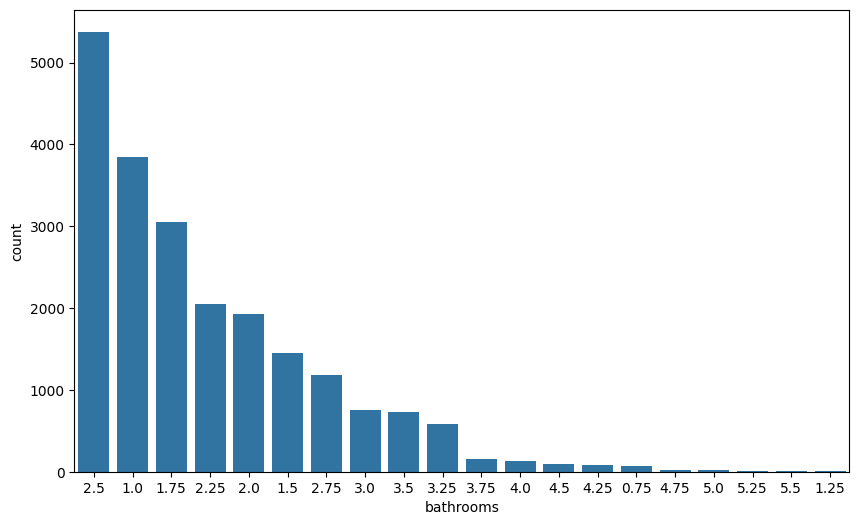

In [28]:
# Calculate the proportion of houses by the number of bathrooms
print("Bathrooms Distribution: \n",house_price['bathrooms'].value_counts(normalize=True))
# almost 25% of the houses have 2.5 bathrooms.

# Create a count plot to visualize the frequency of different bathroom counts
sns.countplot(data=house_price, x="bathrooms", 
              order=house_price['bathrooms'].value_counts().index[:20])  # Show top 20 most common values


House Age Group Distribution: 
 house_age
Newly Built        4538
40-50 Years Old    4353
30-40 Years Old    4276
50+ Years Old      4243
20-30 Years Old    4187
Name: count, dtype: int64


<Axes: xlabel='house_age', ylabel='count'>

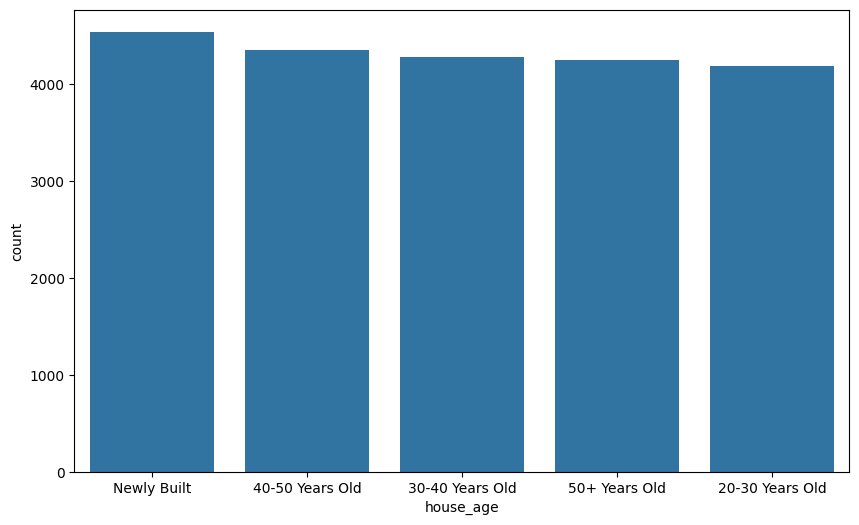

In [29]:
# Display the distribution of house ages group in the dataset
print("House Age Group Distribution: \n",house_price['house_age'].value_counts())
#house are distributed evenly among house ages.
#the majority of houses have less than 50 years old.
sns.countplot(data=house_price,x="house_age", order=house_price['house_age'].value_counts().index[:5])




<Axes: xlabel='house_age_group', ylabel='count'>

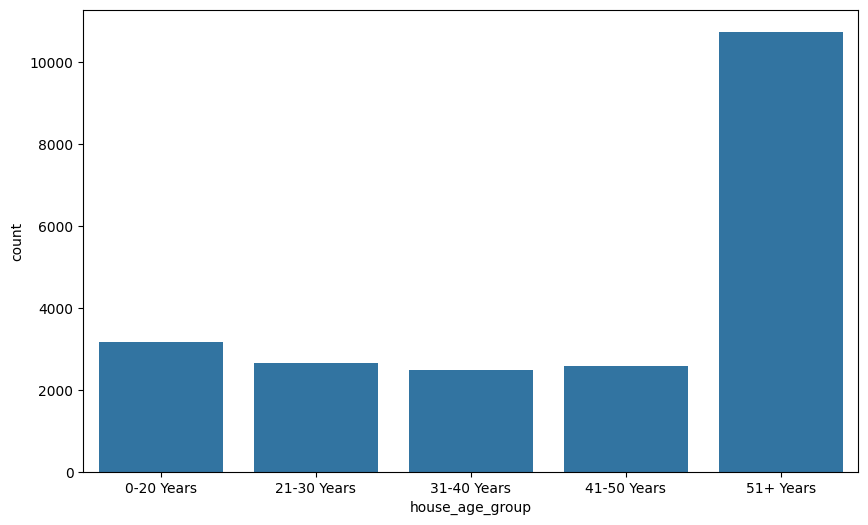

In [30]:
sns.countplot(data=house_price,x="house_age_group")

In [40]:
age=house_price.groupby('house_age_group')['age'].count().reset_index()
age

house_age_group    age
0      0-20 Years   3158
1     21-30 Years   2640
2     31-40 Years   2486
3     41-50 Years   2574
4       51+ Years  10739

House Age Distribution: 
 19847      9
19929      9
21254      9
20295      9
19943      9
        ... 
2549     124
10588    124
2959     124
7842     124
3128     124
Name: age, Length: 21597, dtype: int64


<Axes: xlabel='age', ylabel='count'>

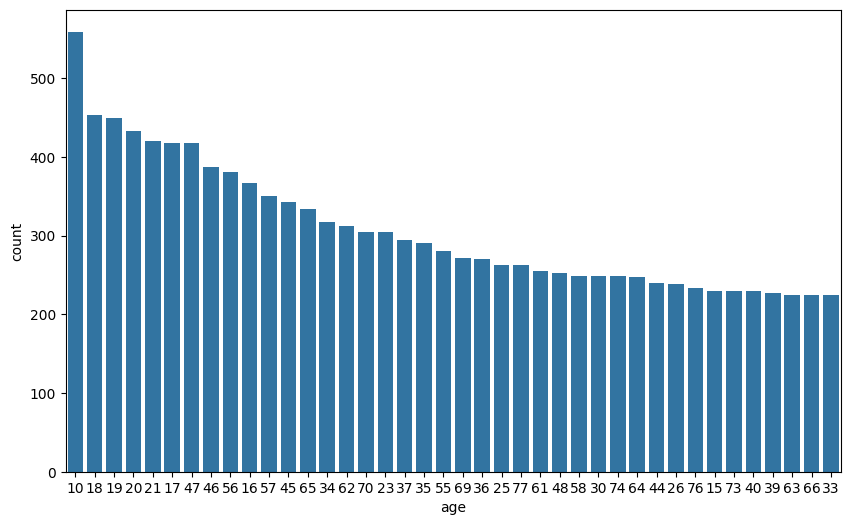

In [41]:
# Display the distribution of house ages in the dataset
print("House Age Distribution: \n",house_price['age'].sort_values())
# the oldest houses are 124 years old.
# Youngest houses are 9 years old.
sns.countplot(data=house_price,x="age", order=house_price['age'].value_counts().index[:40])

Renovated House Distribution: 
 yr_renovated
0.000        17005
20140.000       73
20130.000       31
20030.000       31
20070.000       30
             ...  
19510.000        1
19530.000        1
19460.000        1
19760.000        1
19480.000        1
Name: count, Length: 70, dtype: int64


<Axes: xlabel='yr_renovated', ylabel='count'>

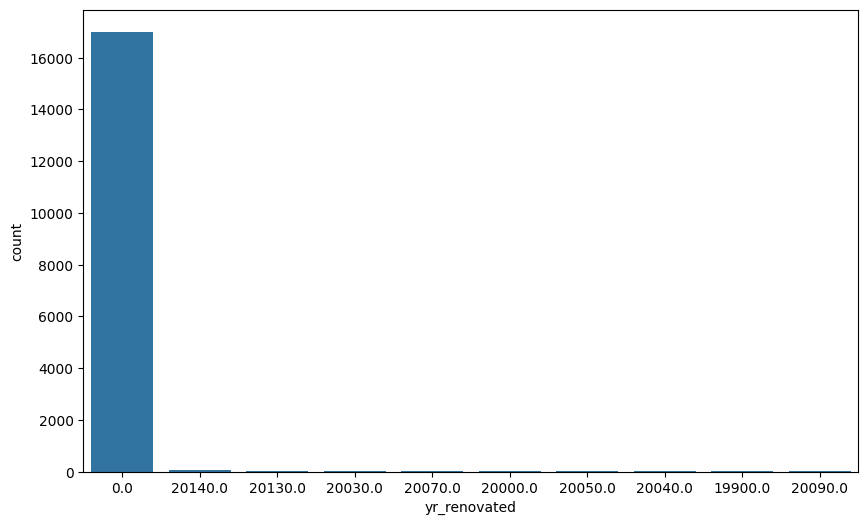

In [42]:
# Renovated House Distribution
print("Renovated House Distribution: \n",house_price['yr_renovated'].value_counts())
# almost 99% of the houses have not been renovated.
sns.countplot(data=house_price,x="yr_renovated", order=house_price['yr_renovated'].value_counts().index[:10])

Zip Code Distribution: 
 zipcode
98103    602
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: count, Length: 70, dtype: int64


<Axes: xlabel='zipcode', ylabel='count'>

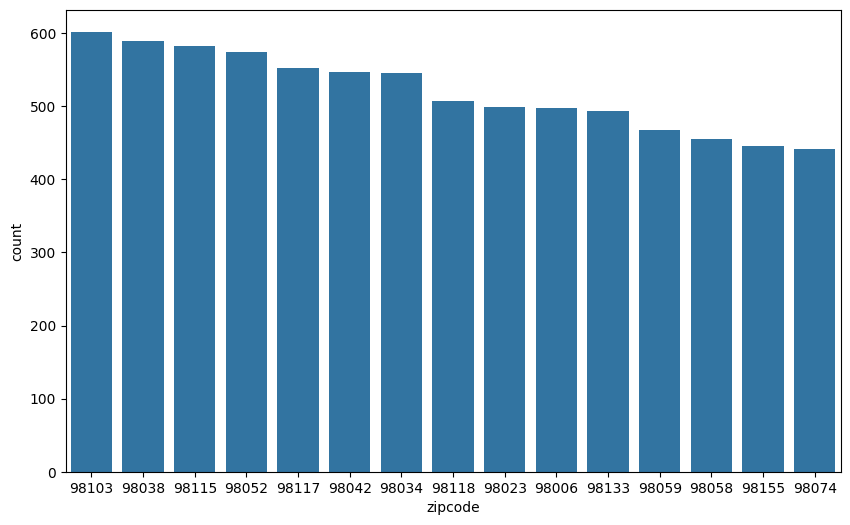

In [43]:
# Zip Code Distribution:
print("Zip Code Distribution: \n",house_price['zipcode'].value_counts())
# top frequent zipcodes: 98103 , 98038 , 98115, 98052, 98117. 
sns.countplot(data=house_price,x="zipcode", order=house_price['zipcode'].value_counts().index[:15])

House Grade Distribution: 
 grade
7     8974
8     6065
9     2615
6     2038
10    1134
11     399
5      242
12      89
4       27
13      13
3        1
Name: count, dtype: int64


<Axes: xlabel='grade', ylabel='count'>

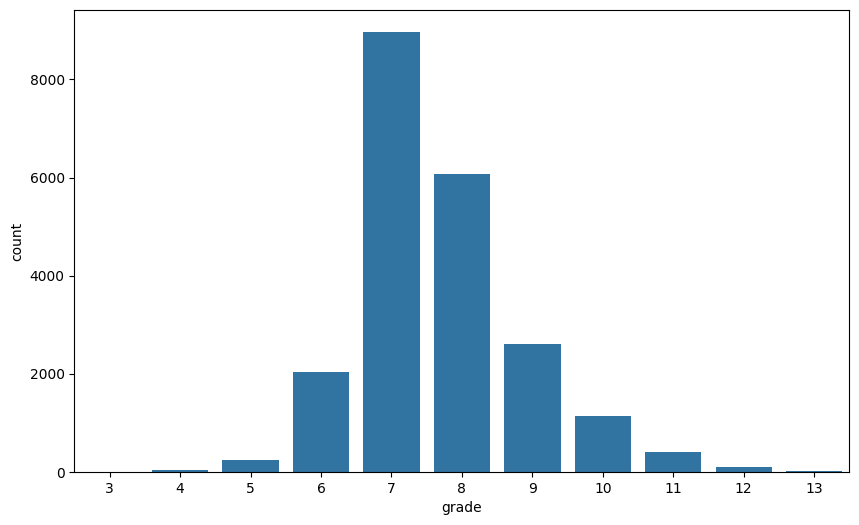

In [44]:
# House Grade Distribution:
print("House Grade Distribution: \n",house_price['grade'].value_counts())
# the majority of houses have a grade between 7 and 11 (inclusive).
sns.countplot(data=house_price,x="grade")
#(1 = Low Quality, 7 = Average , 13 = Mansion)

House condition Distribution: 
 condition
3    14020
4     5677
5     1701
2      170
1       29
Name: count, dtype: int64


<Axes: xlabel='condition', ylabel='count'>

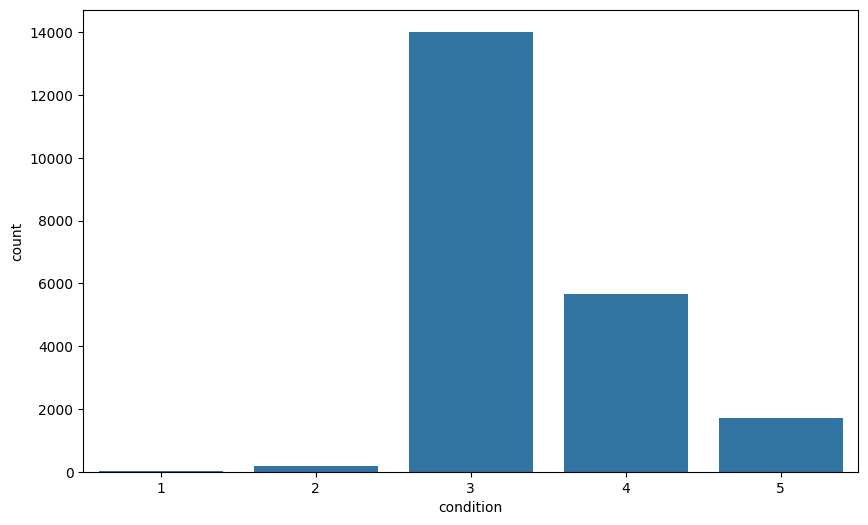

In [45]:
# House condition Distribution:
print("House condition Distribution: \n",house_price['condition'].value_counts())
# the majority of houses have a condition between 3 and 5 (very good).
sns.countplot(data=house_price,x="condition")
#(1 = Poor, 3 = Average, 5 = Very Good)"

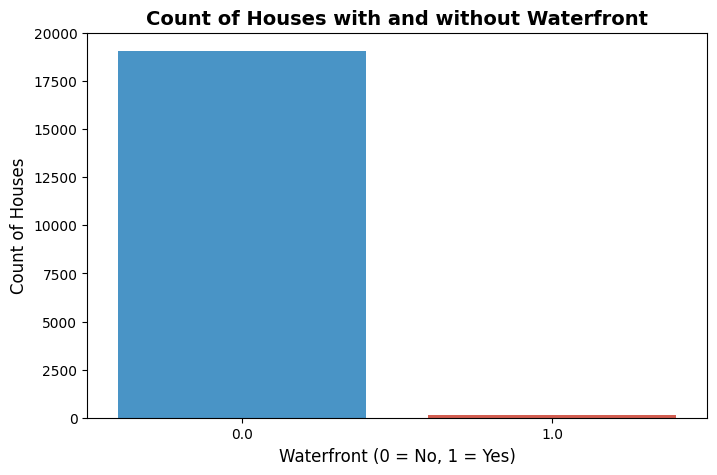

In [46]:
# Waterfront 
# Set figure size
plt.figure(figsize=(8,5))

# Create count plot with better aesthetics
sns.barplot(
    x=house_price["waterfront"].value_counts().index, 
    y=house_price["waterfront"].value_counts().values, 
    palette=["#3498db", "#e74c3c"]
)

# labels and title
plt.xlabel("Waterfront (0 = No, 1 = Yes)", fontsize=12)
plt.ylabel("Count of Houses", fontsize=12)
plt.title("Count of Houses with and without Waterfront", fontsize=14, fontweight="bold")

# Show the plot
plt.show()

# Multivariate Analysis


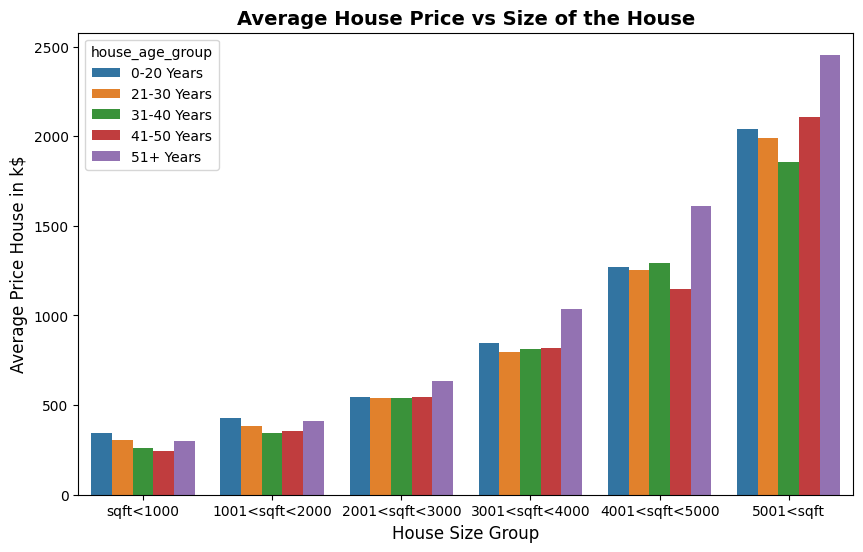

In [47]:
# Grouping data and calculating mean
house_price_size = house_price.groupby(['house_size_group','house_age_group'])[['sqft_living', 'price']].mean().reset_index()

sns.barplot(x='house_size_group', y=(house_price_size["price"]/1000), data=house_price_size,hue="house_age_group")

# labels and title
plt.xlabel("House Size Group", fontsize=12)
plt.ylabel("Average Price House in k$", fontsize=12)
plt.title("Average House Price vs Size of the House", fontsize=14, fontweight="bold")

# Show the plot
plt.show()


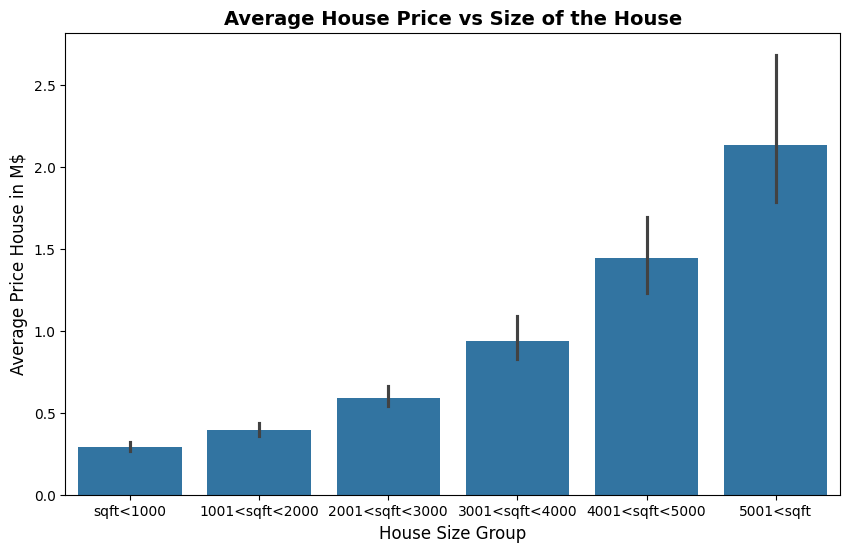

In [48]:
# Grouping data and calculating mean
house_price_size_2 = house_price.groupby(['house_size_group','house_age'])[['sqft_living', 'price']].mean().reset_index()

sns.barplot(x='house_size_group', y=(house_price_size_2["price"]/1000000), data=house_price_size_2)

# labels and title
plt.xlabel("House Size Group", fontsize=12)
plt.ylabel("Average Price House in M$", fontsize=12)
plt.title("Average House Price vs Size of the House", fontsize=14, fontweight="bold")

# Show the plot
plt.show()

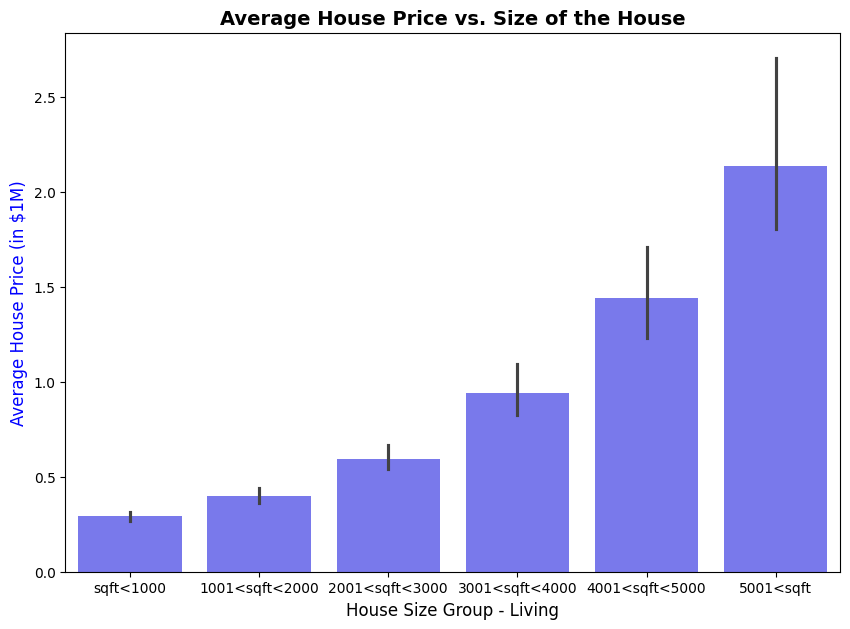

In [50]:
# Plot price as bar plot
fig, ax1 = plt.subplots(figsize=(10, 7))
sns.barplot(x='house_size_group', y=(house_price_size_2["price"] / 1000000), data=house_price_size_2, ax=ax1, color='blue', alpha=0.6)

# Labels and title
ax1.set_xlabel("House Size Group - Living", fontsize=12)
ax1.set_ylabel("Average House Price (in $1M)", fontsize=12, color='blue')
ax1.set_title("Average House Price vs. Size of the House", fontsize=14, fontweight="bold")

# Show the plot
plt.show()

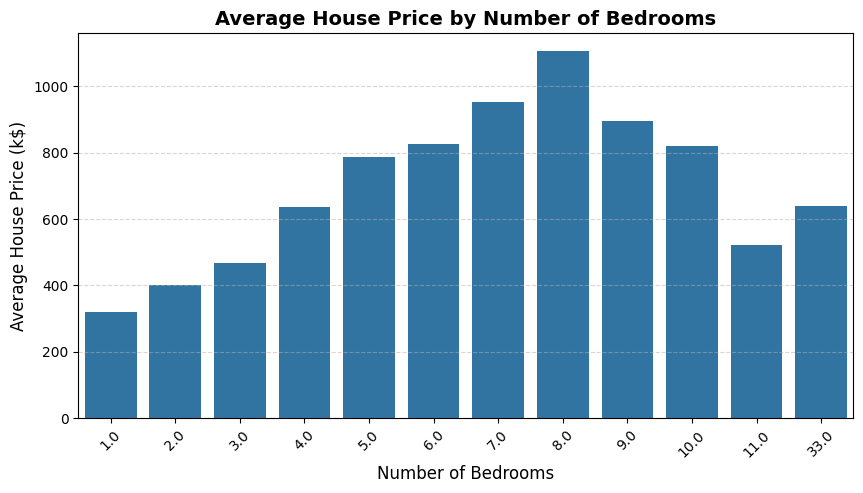

In [51]:
# Bi-variate  Bedroom Vs House Price

# Group by 'bedrooms' and calculate the mean house price
bedroom_price_avg = house_price.groupby('bedrooms')['price'].mean().sort_values(ascending=False)

# Plot the average house price for each bedroom count
plt.figure(figsize=(10, 5))
sns.barplot(x=bedroom_price_avg.index, y=bedroom_price_avg.values/1000)

# Add labels and title
plt.xlabel("Number of Bedrooms", fontsize=12)
plt.ylabel("Average House Price (k$)", fontsize=12)
plt.title("Average House Price by Number of Bedrooms", fontsize=14, fontweight="bold")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle="--", alpha=0.5)  # Add gridlines for better readability

# Show the plot
plt.show()
# The more bedrooms, the higher the price but these is a pic and then goes down. 

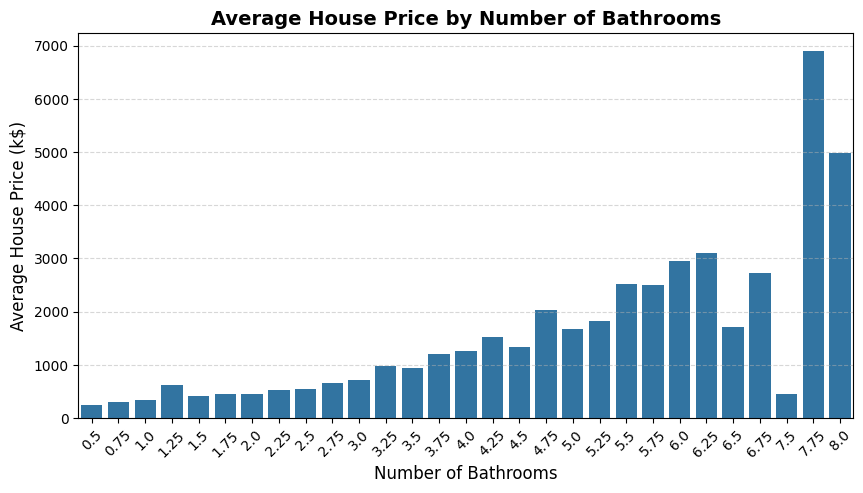

In [52]:
# Bi-variate  Bathroom Vs House Price
# Group by 'bathrooms' and calculate the mean price
bathroom_price_avg = house_price.groupby('bathrooms')['price'].mean().sort_values(ascending=False)

# Plot the average house price for each bathroom count
plt.figure(figsize=(10, 5))
sns.barplot(x=bathroom_price_avg.index, y=bathroom_price_avg.values/1000)

# Add labels and title
plt.xlabel("Number of Bathrooms", fontsize=12)
plt.ylabel("Average House Price (k$)", fontsize=12)
plt.title("Average House Price by Number of Bathrooms", fontsize=14, fontweight="bold")

# Rotate x-axis labels for better readability if necessary
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle="--", alpha=0.5)  # Add gridlines for better readability

# Show the plot
plt.show()
# The more bathrooms, the higher the price.

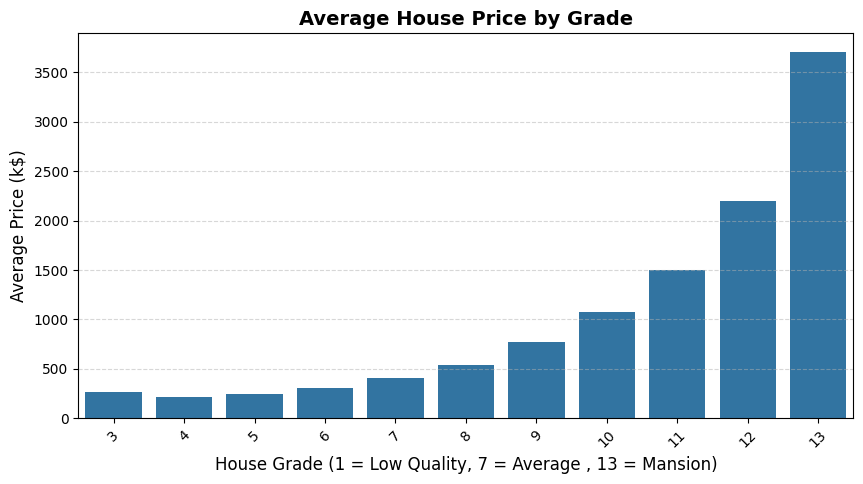

In [53]:
# Bi-variate  House Grade Vs House Price
house_price_grade = house_price.groupby('grade')['price'].mean()

# Plot the average house price for each grade
plt.figure(figsize=(10, 5))
sns.barplot(x=house_price_grade.index, y=house_price_grade.values/1000)

# Add labels and title
plt.xlabel("House Grade (1 = Low Quality, 7 = Average , 13 = Mansion)", fontsize=12)
plt.ylabel("Average Price (k$)", fontsize=12)
plt.title("Average House Price by Grade", fontsize=14, fontweight="bold")

# Show the plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle="--", alpha=0.5)  # Add gridlines for better readability
plt.show()
# high grade houses have higher prices.

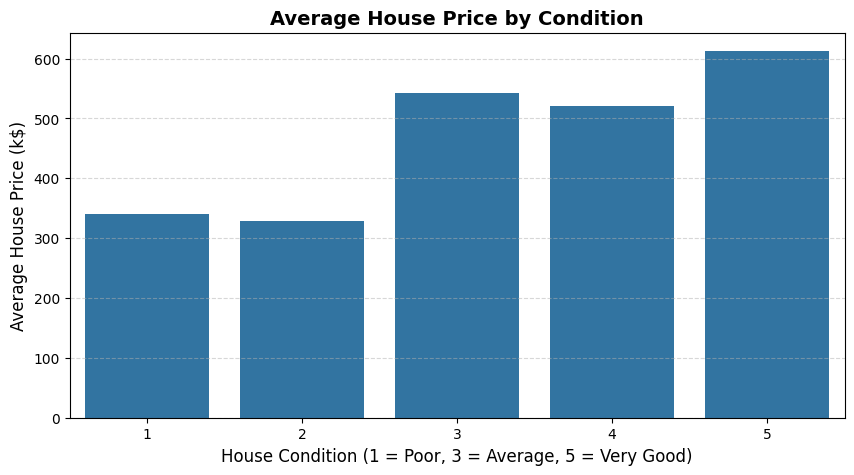

In [54]:
# Bi-variate  House Condition Vs House Price
# Group by 'condition' and calculate the mean house price
house_price_condition = house_price.groupby('condition')['price'].mean()

# Create a bar plot to visualize the average house price for each condition category
plt.figure(figsize=(10, 5))
sns.barplot(x=house_price_condition.index, y=house_price_condition.values/1000)

# Add labels and title for clarity
plt.xlabel("House Condition (1 = Poor, 3 = Average, 5 = Very Good)", fontsize=12)
plt.ylabel("Average House Price (k$)", fontsize=12)
plt.title("Average House Price by Condition", fontsize=14, fontweight="bold")

# Add grid for better readability
plt.grid(axis='y', linestyle="--", alpha=0.5)

# Show the plot
plt.show()

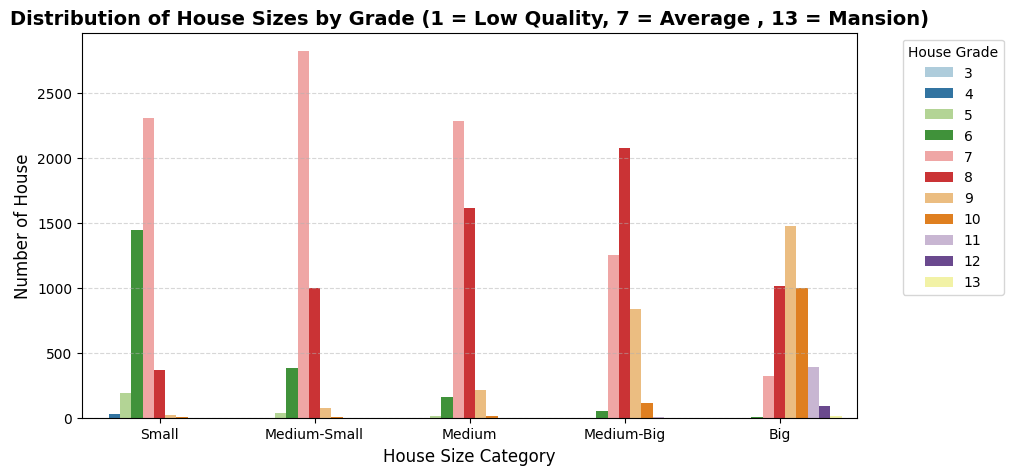

In [55]:
# Set figure size
plt.figure(figsize=(10,5))

# Create countplot with improved aesthetics
sns.countplot(
    x="sqft_living_group", 
    data=house_price, 
    palette="Paired",  # Better color contrast
    order=["Small", "Medium-Small", "Medium", "Medium-Big", "Big"], 
    hue="grade"
)

# Labels and Title
plt.xlabel("House Size Category", fontsize=12)
plt.ylabel("Number of House", fontsize=12)
plt.title("Distribution of House Sizes by Grade (1 = Low Quality, 7 = Average , 13 = Mansion)", fontsize=14, fontweight="bold")

# z legend position and title
plt.legend(title="House Grade", bbox_to_anchor=(1.05, 1), loc="upper left")

# Rotate x-axis labels for better readability
plt.xticks(rotation=0)

# Show grid for better visualization
plt.grid(axis="y", linestyle="--", alpha=0.5)

# Show the plot
plt.show()

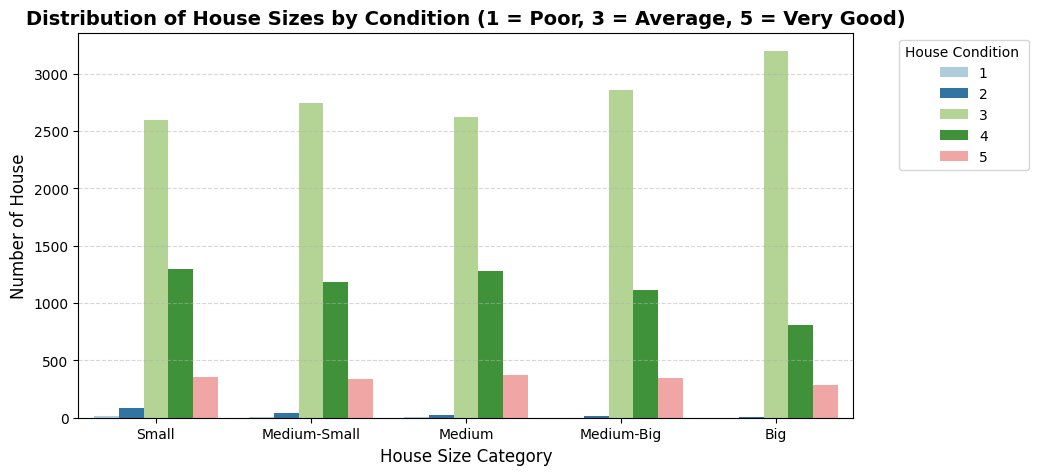

In [56]:
# Set figure size
plt.figure(figsize=(10,5))

# Create countplot with improved aesthetics
sns.countplot(
    x="sqft_living_group", 
    data=house_price, 
    palette="Paired",  # Improved color contrast
    order=["Small", "Medium-Small", "Medium", "Medium-Big", "Big"], 
    hue="condition"
)

# Labels and Title
plt.xlabel("House Size Category", fontsize=12)
plt.ylabel("Number of House", fontsize=12)
plt.title("Distribution of House Sizes by Condition (1 = Poor, 3 = Average, 5 = Very Good)", fontsize=14, fontweight="bold")

# Adjust legend position and title
plt.legend(title="House Condition ", bbox_to_anchor=(1.05, 1), loc="upper left")

# Rotate x-axis labels for better readability
plt.xticks(rotation=0)

# Show grid for better visualization
plt.grid(axis="y", linestyle="--", alpha=0.5)

# Show the plot
plt.show()

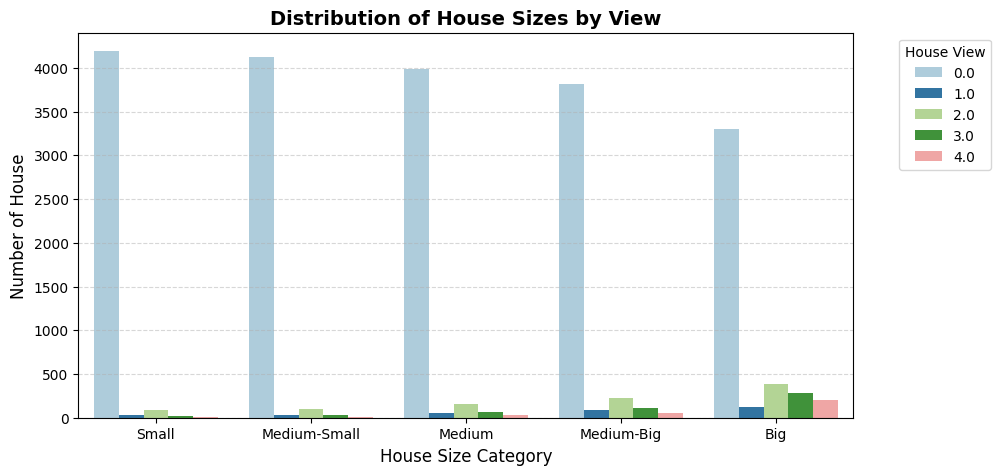

In [57]:
# Set figure size
plt.figure(figsize=(10,5))

# Create countplot with improved aesthetics
sns.countplot(
    x="sqft_living_group", 
    data=house_price, 
    palette="Paired",  # Improved color contrast
    order=["Small", "Medium-Small", "Medium", "Medium-Big", "Big"], 
    hue="view"
)

# Labels and Title
plt.xlabel("House Size Category", fontsize=12)
plt.ylabel("Number of House", fontsize=12)
plt.title("Distribution of House Sizes by View", fontsize=14, fontweight="bold")

# Adjust legend position and title
plt.legend(title="House View", bbox_to_anchor=(1.05, 1), loc="upper left")

# Rotate x-axis labels for better readability
plt.xticks(rotation=0)

# Show grid for better visualization
plt.grid(axis="y", linestyle="--", alpha=0.5)

# Show the plot
plt.show()

In [59]:
house_price.columns

Index(['id', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'date', 'price', 'year-month', 'month',
       'sqft_living_group', 'house_size_group', 'age', 'house_age',
       'house_age_group', 'unit_price_sqft', 'location', 'city',
       'neighborhood'],
      dtype='object')

Result of correlation of Price with 
 sqft_living        0.702
grade              0.668
sqft_above         0.605
sqft_living15      0.585
unit_price_sqft    0.556
bathrooms          0.526
view               0.393
sqft_basement      0.321
bedrooms           0.309
lat                0.307
waterfront         0.264
floors             0.257
yr_renovated       0.118
sqft_lot           0.090
sqft_lot15         0.083
yr_built           0.054
condition          0.036
long               0.022
zipcode           -0.053
Name: price, dtype: float64


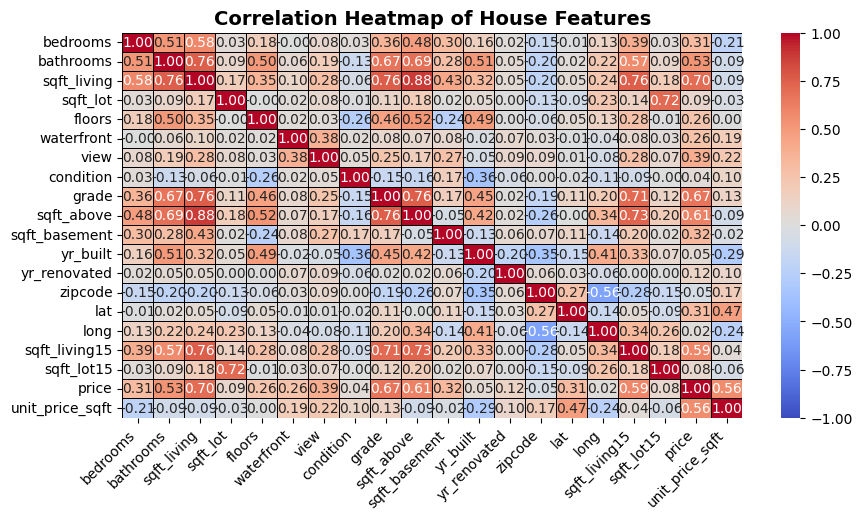

In [60]:
# CORRELATION MATRIX & HEATMAP
# Define columns to drop before computing correlation
columns_to_drop = ['sqft_living_group', 'year-month', 'location', 'city', 'month', 'age', 'house_age', 'house_age_group','house_size_group',
                   'neighborhood', 'id', 'date']

# Compute the correlation matrix after dropping the specified columns
# Fill missing values with 0 to avoid computation errors
house_price_correlation_matrix = house_price.drop(columns=columns_to_drop).fillna(0).corr()

# Print the correlation of 'price' with all other numerical variables (excluding price itself)
print("Result of correlation of Price with \n", 
      house_price_correlation_matrix['price'].sort_values(ascending=False)[1:])  # Exclude the self-correlation (1.0)


plt.figure(figsize=(10, 5))  # Set figure size for better readability

# Create a heatmap to visualize feature correlations
sns.heatmap(
    house_price_correlation_matrix,  # Use the computed correlation matrix
    annot=True,  # Display correlation values inside the heatmap
    fmt=".2f",  # Limit decimal places to two for better readability
    cmap="coolwarm",  # Use a diverging colormap for better contrast (-1 to 1 scale)
    linewidths=0.5,  # Add grid lines for better separation
    linecolor="black",  # Set grid line color
    vmin=-1, vmax=1,  # Standard correlation range (-1 to 1)
    cbar=True  # Show the color bar for reference
)

# label readability
plt.xticks(rotation=45, ha="right", fontsize=10)  # Rotate x-axis labels for better visibility
plt.yticks(fontsize=10)  # Set y-axis label font size

# title to the heatmap
plt.title("Correlation Heatmap of House Features", fontsize=14, fontweight="bold")

# Show the plot
plt.show()


Key Takeaways:
- House size (sqft_living) is the biggest price driver.
- High-quality materials (grade) significantly increase property value.
- Older homes tend to have slightly lower prices.
- Condition impacts price less than expected compared to grade & size.
- Unit price per sqft is an important metric for affordability and varies with house size.
- More bedrooms don’t always mean higher prices—total living space matters more.
- Location (zipcode, waterfront) has a weaker impact than expected, suggesting pricing depends more on house characteristics than general area.

## Hypothesis 1

1️⃣ Does property size in central neighborhoods impact affordability?
- Hypothesis: Smaller properties in central neighborhoods tend to be more affordable than larger ones. 
- Indicator:  `sqft_living`, `zipcode`, `unit_price_sqft`.

In [61]:
house_price.columns

Index(['id', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'date', 'price', 'year-month', 'month',
       'sqft_living_group', 'house_size_group', 'age', 'house_age',
       'house_age_group', 'unit_price_sqft', 'location', 'city',
       'neighborhood'],
      dtype='object')

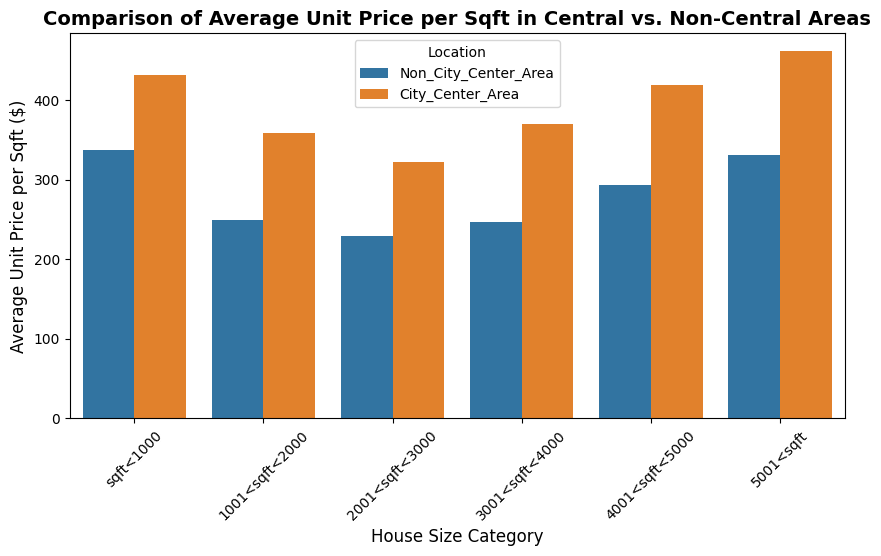

In [62]:
#calculate the average unit price per square foot in central and non-central areas
hypothesis_1=house_price.groupby(["location","house_size_group"])["unit_price_sqft"].mean().reset_index().sort_values("unit_price_sqft")
plt.figure(figsize=(10, 5))  # Set figure size for better readability

# Create a bar plot to compare unit prices in central vs. non-central areas by house size group
sns.barplot(
    data=hypothesis_1,
    x="house_size_group",
    y="unit_price_sqft",
    hue="location",  # Differentiate city center vs. non-city center
    
)

# Add labels and title for clarity
plt.xlabel("House Size Category", fontsize=12)  # X-axis label
plt.ylabel("Average Unit Price per Sqft ($)", fontsize=12)  # Y-axis label
plt.title("Comparison of Average Unit Price per Sqft in Central vs. Non-Central Areas", fontsize=14, fontweight="bold")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add a legend to distinguish between central and non-central areas
plt.legend(title="Location")

# Show the plot
plt.show()

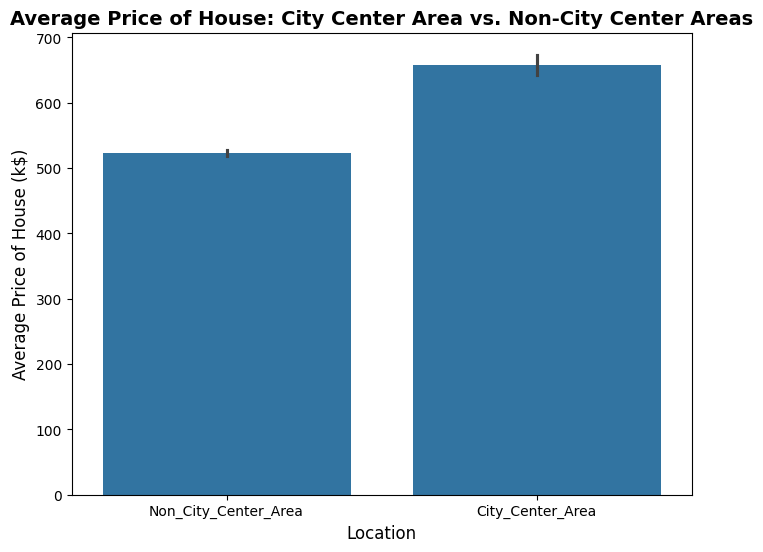

In [63]:
# COMPARING AVERAGE PRICE: CITY CENTER VS. NON-CITY CENTER

plt.figure(figsize=(8, 6))  # Set figure size for better visualization

# bar plot comparing average price between central and non-central areas
sns.barplot(x="location", y=house_price["price"] / 1000, data=house_price)

# labels and title for better clarity
plt.xlabel("Location", fontsize=12)  # X-axis label (City Center vs. Non-City Center)
plt.ylabel("Average Price of House (k$)", fontsize=12)  # Y-axis label (Price)
plt.title("Average Price of House: City Center Area vs. Non-City Center Areas", fontsize=14, fontweight="bold")

# Show the plot
plt.show()

### Conclusion: Does Property Size in Central Neighborhoods Impact Affordability?

 The hypothesis is NOT supported. 
- Smaller properties in central neighborhoods are NOT more affordable; they are actually the most expensive per sqft.
- House affordability is better in non-central areas, where price per sqft is lower across all house sizes.

## Hypothesis 2

2️⃣ Does the timing of purchase affect house prices?
- Hypothesis: House prices fluctuate seasonally, with peaks and dips depending on the time of year.
- Indicator: `date`, `month`, `unit_price_sqft`.

In [64]:
# Group by year-month and location to calculate the average unit price per square foot
month_price = (
    house_price.groupby(['year-month', 'location'])["unit_price_sqft"]
    .mean()  # Compute the average unit price per sqft
    .reset_index()  # Reset index to convert it back into a structured DataFrame
)

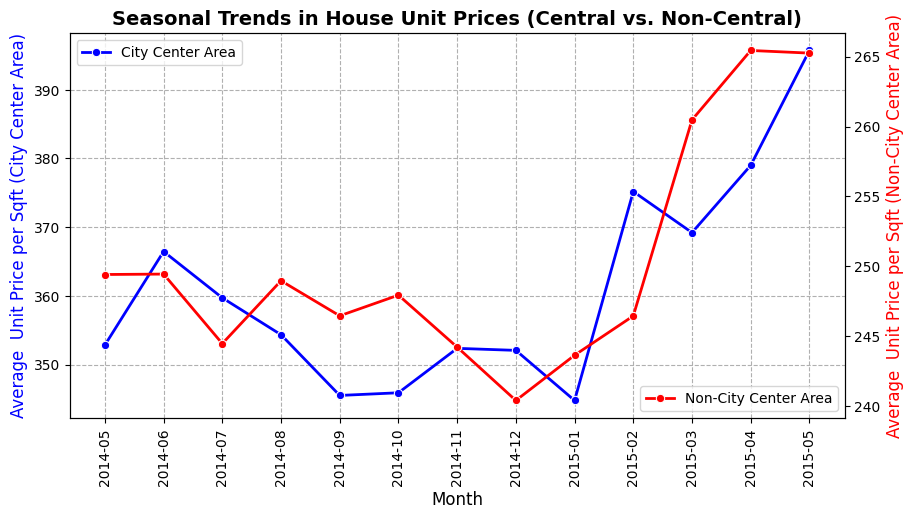

In [65]:
# Create figure and axis
fig, ax1 = plt.subplots(figsize=(10,5))

# Create second y-axis
ax2 = ax1.twinx()

# Plot for City Center Area (Central)
sns.lineplot(
    x="year-month", 
    y="unit_price_sqft", 
    data=month_price[month_price["location"] == "City_Center_Area"],
    marker="o",
    linewidth=2,
    ax=ax1, 
    color="blue",
    label="City Center Area"
)

# Plot for Non-City Center Area
sns.lineplot(
    x="year-month", 
    y="unit_price_sqft", 
    data=month_price[month_price["location"] == "Non_City_Center_Area"],
    marker="o",
    linewidth=2,
    ax=ax2, 
    color="red",
    label="Non-City Center Area"
)

# Improve Labels & Titles
ax1.set_xlabel("Month", fontsize=12)
ax1.set_ylabel("Average  Unit Price per Sqft (City Center Area)", fontsize=12, color="blue")
ax2.set_ylabel("Average  Unit Price per Sqft (Non-City Center Area)", fontsize=12, color="red")
plt.title("Seasonal Trends in House Unit Prices (Central vs. Non-Central)", fontsize=14, fontweight="bold")


# Set x-axis tick labels for readability
#ax1.set_xticks(range(0, len(month_price["year-month"].unique()), 2))  # Show every 2nd month for spacing
ax1.set_xticklabels(month_price["year-month"].unique(), rotation=90)


# Add legends separately for better visibility
legend1 = ax1.legend(loc="upper left")
legend2 = ax2.legend(loc="lower right")

# Customize Grid
ax1.grid(True, linestyle="--", alpha=1)

# Show final plot
plt.show()


###  Conclusion: Does the Timing of Purchase Within the Year Affect House Prices?


The hypothesis is supported!
- House prices fluctuate throughout the year, with the highest prices in early spring (Feb–May) and a slight dip in summer (Jun–Sep).
- Buyers looking for affordability may find better deals in late summer or early fall.
- Sellers aiming for the best price should list their homes between February and May. 

### Hypothesis 3


3️⃣ How do condition and grade affect house prices?
- Hypothesis: Houses in better condition and with a higher grade classification are generally more expensive.
- Indicator: `condition`, `grade`, `unit_price_sqft`.

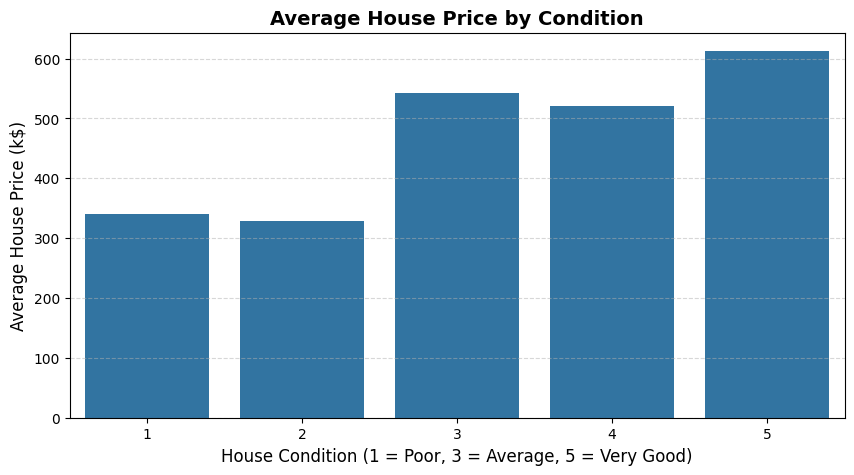

In [66]:
# Bi-variate  House Condition Vs House Price
# Group by 'condition' and calculate the mean house price
house_price_condition = house_price.groupby('condition')['price'].mean()

# Create a bar plot to visualize the average house price for each condition category
plt.figure(figsize=(10, 5))
sns.barplot(x=house_price_condition.index, y=house_price_condition.values/1000)

# Add labels and title for clarity
plt.xlabel("House Condition (1 = Poor, 3 = Average, 5 = Very Good)", fontsize=12)
plt.ylabel("Average House Price (k$)", fontsize=12)
plt.title("Average House Price by Condition", fontsize=14, fontweight="bold")

# Add grid for better readability
plt.grid(axis='y', linestyle="--", alpha=0.5)

# Show the plot
plt.show()

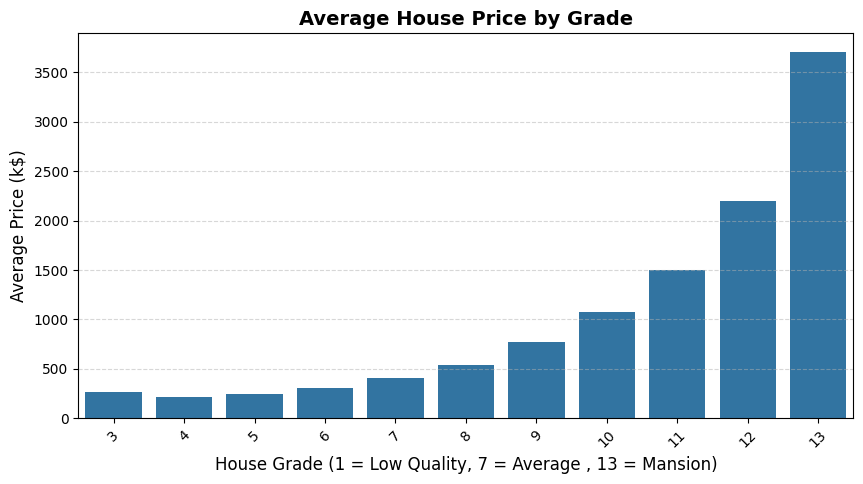

In [67]:
# Bi-variate  House Grade Vs House Price
house_price_grade = house_price.groupby('grade')['price'].mean()

# Plot the average house price for each grade
plt.figure(figsize=(10, 5))
sns.barplot(x=house_price_grade.index, y=house_price_grade.values/1000)

# Add labels and title
plt.xlabel("House Grade (1 = Low Quality, 7 = Average , 13 = Mansion)", fontsize=12)
plt.ylabel("Average Price (k$)", fontsize=12)
plt.title("Average House Price by Grade", fontsize=14, fontweight="bold")

# Show the plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle="--", alpha=0.5)  # Add gridlines for better readability
plt.show()
# high grade houses have higher prices.

# Conclusion: How Does Condition & Grade Affect House Prices?

- House grade has a stronger impact on price than condition**, with higher-grade homes significantly more expensive.  
- For buyers, moderately graded, well-maintained houses offer better affordability
- House condition matters, but grade plays a dominant role in determining price, especially in City Center.


## Recommended Houses: City Center Area and Middle Range Price and best time buying

Text(0.5, 1.0, 'House Price vs House Size based on Price Range')

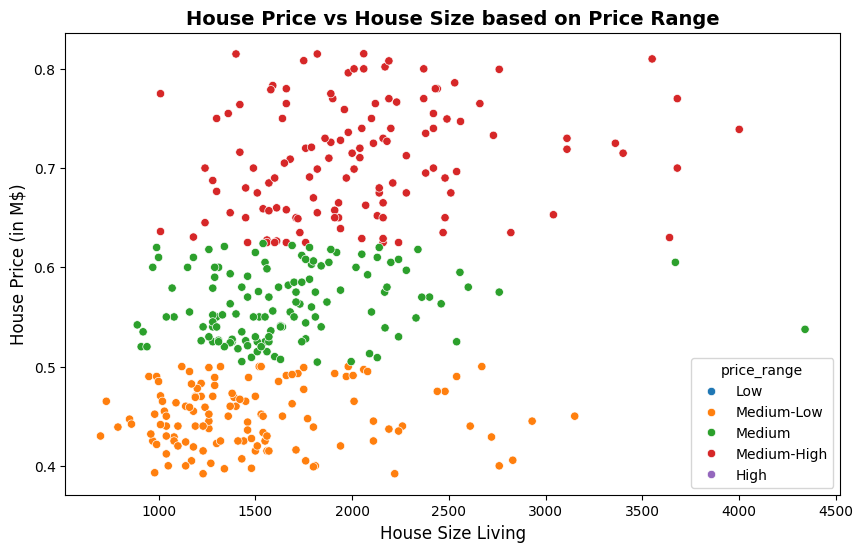

In [73]:
# Define the price range bins
city_center_house["price_range"] = pd.qcut(
    city_center_house["price"], q=5, 
    labels=["Low", "Medium-Low", "Medium", "Medium-High", "High"], 
    precision=1
)

# Define the right time filter
right_time_buy_filter = ["2014-09", "2014-10", "2015-01"]
middle_range_price_filter=["Medium-Low", "Medium", "Medium-High"]
grade_filter=[6,7,8,9,10,11,12,13]
condition_filter=[3,4,5]
# Correct query using backticks for column name and @ for external variable
city_center_house_filter= city_center_house.query(
    "`year-month` in @right_time_buy_filter and `price_range` in @middle_range_price_filter and  grade in @grade_filter and condition in @condition_filter"
)

sns.scatterplot(x="sqft_living", y=(city_center_house_filter["price"]/1000000), hue="price_range", data=city_center_house_filter)
plt.xlabel("House Size Living", fontsize=12)
plt.ylabel("House Price (in M$)", fontsize=12)
plt.title("House Price vs House Size based on Price Range", fontsize=14, fontweight="bold")


In [54]:
city_center_house_filter.shape

(377, 31)

In [74]:
# to plot the houses on a map
fig = px.scatter_mapbox(
    city_center_house_filter,
    lat="lat",
    lon="long",
    color="price",  # Color houses based on price
    
    mapbox_style="open-street-map",  # Background map style
    title="House Locations by Price"
)
# Show plot
fig.show()

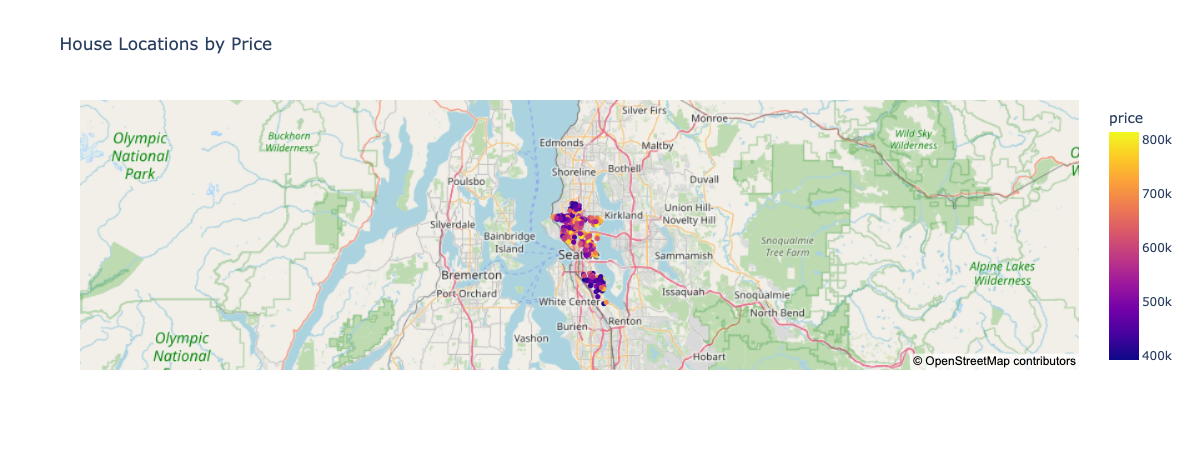

In [75]:
# Display image
Image("Map02.png")

In [79]:
city_center_house_filter.columns

Index(['id', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'date', 'price', 'year-month', 'month',
       'sqft_living_group', 'house_size_group', 'age', 'house_age',
       'house_age_group', 'unit_price_sqft', 'location', 'city',
       'neighborhood', 'price_range'],
      dtype='object')

In [80]:
# Grouping by zipcode, house age, and neighborhood while calculating the mean of selected features
city_center_recommended = city_center_house_filter[city_center_house_filter["house_age_group"] == '0-20 Years'].groupby(
    [ 'price_range',"house_age_group"]
)[['price', 'sqft_living', 'bedrooms', 'unit_price_sqft']].mean().reset_index()
recommended = city_center_recommended[~city_center_recommended["unit_price_sqft"].isna()]
recommended.sort_values("unit_price_sqft")

price_range house_age_group      price  sqft_living  bedrooms  \
5    Medium-Low      0-20 Years 460271.053     1502.500     2.868   
10       Medium      0-20 Years 551190.278     1503.472     2.778   
15  Medium-High      0-20 Years 686210.714     1895.000     2.857   

    unit_price_sqft  
5           330.559  
10          375.424  
15          384.433

## Recommended Houses A

In [81]:
# Define the filtering condition properly using parentheses
recommend_con = (
    (city_center_house_filter["price_range"] == 'Medium-Low') &  # Ensure houses fall in the 'Medium-Low' price range
    (city_center_house_filter["house_age_group"] == '0-20 Years')  # Ensure only newly built houses are selected
)

# Apply the filter and sort by price in ascending order
recommended_houses_A = city_center_house_filter[recommend_con].sort_values("price").head(5)

recommended_houses_A["Recommend"]= 'A'
# Display the top 5 recommended houses
recommended_houses_A

id  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
4517    993001332     3.000      2.250     1430.000  1448.000   3.000   
19767  4310702858     3.000      2.500     1570.000  1551.000   3.000   
811    7234600903     2.000      2.250     1180.000  1253.000   2.000   
20902  5695000142     2.000      1.500     1100.000  1107.000   3.000   
8852   4310701565     3.000      3.250     1410.000  1350.000   3.000   

       waterfront  view  condition  grade  ...  house_size_group  age  \
4517        0.000 0.000          3      8  ...    1001<sqft<2000   19   
19767       0.000 0.000          3      8  ...    1001<sqft<2000   16   
811         0.000 0.000          3      8  ...    1001<sqft<2000   16   
20902       0.000 0.000          3      8  ...    1001<sqft<2000   16   
8852        0.000 0.000          3      8  ...    1001<sqft<2000   19   

         house_age  house_age_group  unit_price_sqft          location  \
4517   Newly Built       0-20 Years          284.615  City_Center_Area   
19767  Newly Built       0-20 Years          264.299  City_Center_Area   
811    Newly Built       0-20 Years          355.085  City_Center_Area   
20902  Newly Built       0-20 Years          381.818  City_Center_Area   
8852   Newly Built       0-20 Years          301.418  City_Center_Area   

          city          neighborhood  price_range Recommend  
4517   Seattle               Fremont   Medium-Low         A  
19767  Seattle               Fremont   Medium-Low         A  
811    Seattle  Capitol Hill (South)   Medium-Low         A  
20902  Seattle               Fremont   Medium-Low         A  
8852   Seattle               Fremont   Medium-Low         A  

[5 rows x 34 columns]

## Recommended Houses B

In [82]:
# Define the filtering condition properly using parentheses
recommend_con = (
    (city_center_house_filter["price_range"] == 'Medium') &  # Ensure houses fall in the 'Medium' price range
    (city_center_house_filter["house_age_group"] == '0-20 Years')  # Ensure only newly built houses are selected
)

# Apply the filter and sort by price in ascending order
recommended_houses_B = city_center_house_filter[recommend_con].sort_values("price").head(5)

recommended_houses_B["Recommend"]= 'B'
# Display the top 5 recommended houses
recommended_houses_B


id  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
21570  2767604724     2.000      2.500     1430.000  1201.000   3.000   
15993  9826700726     3.000      2.500     1995.000  1483.000   3.000   
20203  9828702649     3.000      2.500     1510.000  1178.000   2.000   
19919  9126100814     3.000      2.000     1560.000  1020.000   3.000   
21579  1972201967     2.000      2.250     1530.000   981.000   3.000   

       waterfront  view  condition  grade  ...  house_size_group  age  \
21570       0.000 0.000          3      8  ...    1001<sqft<2000   15   
15993       0.000 0.000          3      8  ...    1001<sqft<2000   19   
20203       0.000 0.000          3      8  ...    1001<sqft<2000   17   
19919       0.000 0.000          3      8  ...    1001<sqft<2000   10   
21579       0.000 0.000          3      8  ...    1001<sqft<2000   18   

         house_age  house_age_group  unit_price_sqft          location  \
21570  Newly Built       0-20 Years          353.147  City_Center_Area   
15993  Newly Built       0-20 Years          253.133  City_Center_Area   
20203  Newly Built       0-20 Years          341.060  City_Center_Area   
19919  Newly Built       0-20 Years          330.128  City_Center_Area   
21579  Newly Built       0-20 Years          339.869  City_Center_Area   

          city          neighborhood  price_range Recommend  
21570  Seattle               Ballard       Medium         B  
15993  Seattle          Capitol Hill       Medium         B  
20203  Seattle  Capitol Hill (South)       Medium         B  
19919  Seattle  Capitol Hill (South)       Medium         B  
21579  Seattle               Fremont       Medium         B  

[5 rows x 34 columns]

## Recommended Houses C

In [83]:
# Define the filtering condition properly using parentheses
recommend_con = (
    (city_center_house_filter["price_range"] == 'Medium-High') &  # Ensure houses fall in the 'Medium-High' price range
     (city_center_house_filter["house_age_group"] == '0-20 Years')  # Ensure only newly built houses are selected
)

# Apply the filter and sort by price in ascending order
recommended_houses_C = city_center_house_filter[recommend_con].sort_values("price").head(5)

recommended_houses_C["Recommend"]= 'C'
# Display the top 5 recommended houses
recommended_houses_C

id  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
20657  1646500810     2.000      1.750     1460.000  1500.000   2.000   
20121  6056110430     3.000      2.500     2160.000  1912.000   2.000   
21227  1105000402     4.000      3.000     3640.000  5096.000   2.000   
6234   6848200221     3.000      3.500     1730.000  1349.000   3.000   
19685  2767601872     2.000      3.000     1570.000  1281.000   3.000   

       waterfront  view  condition  grade  ...  house_size_group  age  \
20657         NaN 0.000          3      8  ...    1001<sqft<2000   16   
20121       0.000 0.000          3      9  ...    2001<sqft<3000   10   
21227       0.000 0.000          3      8  ...    3001<sqft<4000   14   
6234        0.000 0.000          3      9  ...    1001<sqft<2000   15   
19685         NaN 0.000          3      8  ...    1001<sqft<2000   10   

         house_age  house_age_group  unit_price_sqft          location  \
20657  Newly Built       0-20 Years          428.082  City_Center_Area   
20121  Newly Built       0-20 Years          291.204  City_Center_Area   
21227  Newly Built       0-20 Years          173.077  City_Center_Area   
6234   Newly Built       0-20 Years          367.052  City_Center_Area   
19685  Newly Built       0-20 Years          418.471  City_Center_Area   

          city   neighborhood  price_range Recommend  
20657  Seattle        Fremont  Medium-High         C  
20121  Seattle  Columbia City  Medium-High         C  
21227  Seattle  Columbia City  Medium-High         C  
6234   Seattle   Capitol Hill  Medium-High         C  
19685  Seattle        Ballard  Medium-High         C  

[5 rows x 34 columns]

In [84]:

# Concatenate the DataFrames horizontally (side by side)
recommended_houses_combine_ABC = pd.concat(
    [recommended_houses_A, recommended_houses_B, recommended_houses_C], axis=0
)
recommended_houses_combine_ABC


id  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
4517    993001332     3.000      2.250     1430.000  1448.000   3.000   
19767  4310702858     3.000      2.500     1570.000  1551.000   3.000   
811    7234600903     2.000      2.250     1180.000  1253.000   2.000   
20902  5695000142     2.000      1.500     1100.000  1107.000   3.000   
8852   4310701565     3.000      3.250     1410.000  1350.000   3.000   
21570  2767604724     2.000      2.500     1430.000  1201.000   3.000   
15993  9826700726     3.000      2.500     1995.000  1483.000   3.000   
20203  9828702649     3.000      2.500     1510.000  1178.000   2.000   
19919  9126100814     3.000      2.000     1560.000  1020.000   3.000   
21579  1972201967     2.000      2.250     1530.000   981.000   3.000   
20657  1646500810     2.000      1.750     1460.000  1500.000   2.000   
20121  6056110430     3.000      2.500     2160.000  1912.000   2.000   
21227  1105000402     4.000      3.000     3640.000  5096.000   2.000   
6234   6848200221     3.000      3.500     1730.000  1349.000   3.000   
19685  2767601872     2.000      3.000     1570.000  1281.000   3.000   

       waterfront  view  condition  grade  ...  house_size_group  age  \
4517        0.000 0.000          3      8  ...    1001<sqft<2000   19   
19767       0.000 0.000          3      8  ...    1001<sqft<2000   16   
811         0.000 0.000          3      8  ...    1001<sqft<2000   16   
20902       0.000 0.000          3      8  ...    1001<sqft<2000   16   
8852        0.000 0.000          3      8  ...    1001<sqft<2000   19   
21570       0.000 0.000          3      8  ...    1001<sqft<2000   15   
15993       0.000 0.000          3      8  ...    1001<sqft<2000   19   
20203       0.000 0.000          3      8  ...    1001<sqft<2000   17   
19919       0.000 0.000          3      8  ...    1001<sqft<2000   10   
21579       0.000 0.000          3      8  ...    1001<sqft<2000   18   
20657         NaN 0.000          3      8  ...    1001<sqft<2000   16   
20121       0.000 0.000          3      9  ...    2001<sqft<3000   10   
21227       0.000 0.000          3      8  ...    3001<sqft<4000   14   
6234        0.000 0.000          3      9  ...    1001<sqft<2000   15   
19685         NaN 0.000          3      8  ...    1001<sqft<2000   10   

         house_age  house_age_group  unit_price_sqft          location  \
4517   Newly Built       0-20 Years          284.615  City_Center_Area   
19767  Newly Built       0-20 Years          264.299  City_Center_Area   
811    Newly Built       0-20 Years          355.085  City_Center_Area   
20902  Newly Built       0-20 Years          381.818  City_Center_Area   
8852   Newly Built       0-20 Years          301.418  City_Center_Area   
21570  Newly Built       0-20 Years          353.147  City_Center_Area   
15993  Newly Built       0-20 Years          253.133  City_Center_Area   
20203  Newly Built       0-20 Years          341.060  City_Center_Area   
19919  Newly Built       0-20 Years          330.128  City_Center_Area   
21579  Newly Built       0-20 Years          339.869  City_Center_Area   
20657  Newly Built       0-20 Years          428.082  City_Center_Area   
20121  Newly Built       0-20 Years          291.204  City_Center_Area   
21227  Newly Built       0-20 Years          173.077  City_Center_Area   
6234   Newly Built       0-20 Years          367.052  City_Center_Area   
19685  Newly Built       0-20 Years          418.471  City_Center_Area   

          city          neighborhood  price_range Recommend  
4517   Seattle               Fremont   Medium-Low         A  
19767  Seattle               Fremont   Medium-Low         A  
811    Seattle  Capitol Hill (South)   Medium-Low         A  
20902  Seattle               Fremont   Medium-Low         A  
8852   Seattle               Fremont   Medium-Low         A  
21570  Seattle               Ballard       Medium         B  
15993  Seattle          Capitol Hill       Medium         

In [85]:
# Create an interactive map with a larger size for better visibility
fig = px.scatter_mapbox(
    recommended_houses_combine_ABC,
    lat="lat",
    lon="long",
    color="price",  # Color houses based on price
    size="sqft_living",  # Size of points based on house size
    hover_name="price",  # Show price when hovering over points
    hover_data=["bedrooms", "bathrooms", "sqft_living"],  # Extra details on hover
    zoom=10,  # Adjust zoom level
    mapbox_style="open-street-map",  # Background map style
    title="House Locations by Price and Size"
)

# Adjust figure size for better display
fig.update_layout(
    width=1200,  # Set larger width
    height=800,  # Set larger height
    margin={"r":0, "t":50, "l":0, "b":0}  # Reduce margins for full-screen effect
)

# Show plot
fig.show()

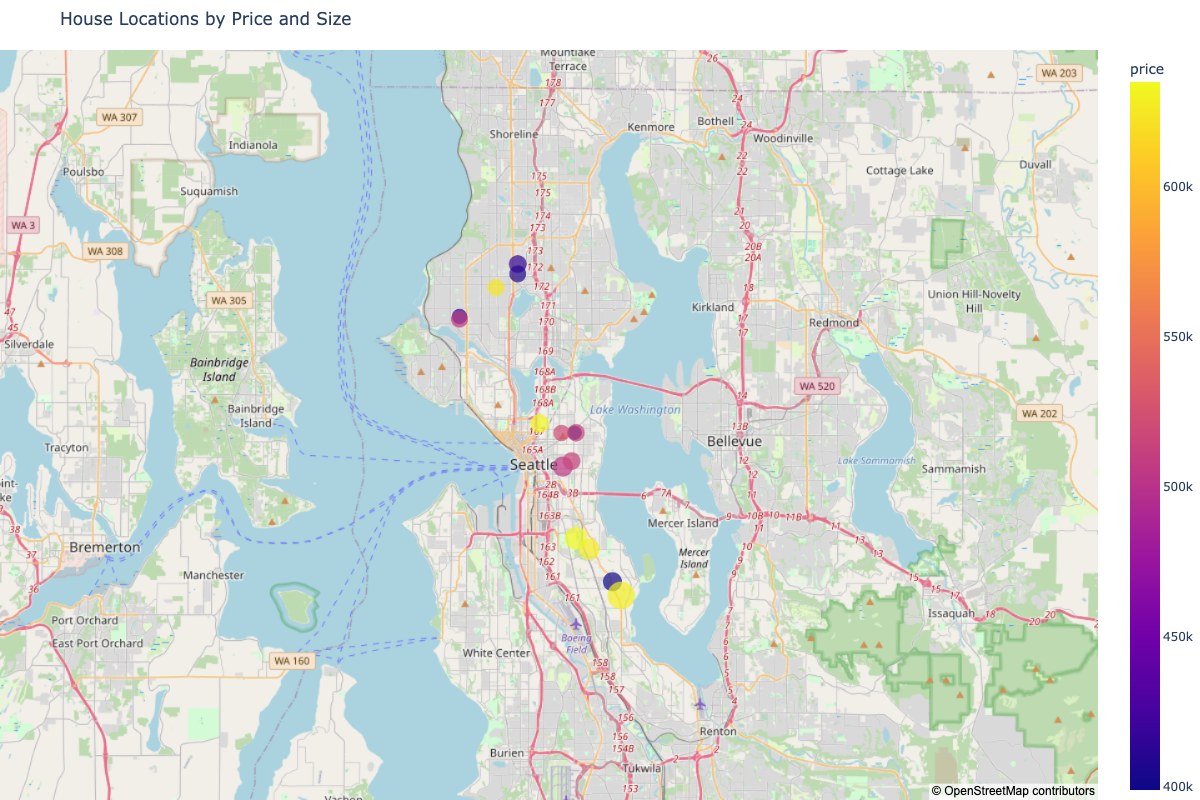

In [86]:
# Display image
Image("Map03.png")

In [90]:
recommended_houses_combine_ABC.to_csv('recommended_houses.csv', index=False)
recommended_houses_combine_ABC.columns


Index(['id', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'date', 'price', 'year-month', 'month',
       'sqft_living_group', 'house_size_group', 'age', 'house_age',
       'house_age_group', 'unit_price_sqft', 'location', 'city',
       'neighborhood', 'price_range', 'Recommend'],
      dtype='object')

In [93]:
recommended_houses_combine_ABC[['Recommend','id', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade','age','zipcode', 'lat', 'long','unit_price_sqft','price']]

Recommend          id  bedrooms  bathrooms  sqft_living  sqft_lot  \
4517          A   993001332     3.000      2.250     1430.000  1448.000   
19767         A  4310702858     3.000      2.500     1570.000  1551.000   
811           A  7234600903     2.000      2.250     1180.000  1253.000   
20902         A  5695000142     2.000      1.500     1100.000  1107.000   
8852          A  4310701565     3.000      3.250     1410.000  1350.000   
21570         B  2767604724     2.000      2.500     1430.000  1201.000   
15993         B  9826700726     3.000      2.500     1995.000  1483.000   
20203         B  9828702649     3.000      2.500     1510.000  1178.000   
19919         B  9126100814     3.000      2.000     1560.000  1020.000   
21579         B  1972201967     2.000      2.250     1530.000   981.000   
20657         C  1646500810     2.000      1.750     1460.000  1500.000   
20121         C  6056110430     3.000      2.500     2160.000  1912.000   
21227         C  1105000402     4.000      3.000     3640.000  5096.000   
6234          C  6848200221     3.000      3.500     1730.000  1349.000   
19685         C  2767601872     2.000      3.000     1570.000  1281.000   

       floors  waterfront  view  condition  grade  age  zipcode    lat  \
4517    3.000       0.000 0.000          3      8   19    98103 47.692   
19767   3.000       0.000 0.000          3      8   16    98103 47.696   
811     2.000       0.000 0.000          3      8   16    98122 47.612   
20902   3.000       0.000 0.000          3      8   16    98103 47.658   
8852    3.000       0.000 0.000          3      8   19    98103 47.698   
21570   3.000       0.000 0.000          3      8   15    98107 47.671   
15993   3.000       0.000 0.000          3      8   19    98102 47.602   
20203   2.000       0.000 0.000          3      8   17    98122 47.618   
19919   3.000       0.000 0.000          3      8   10    98122 47.605   
21579   3.000       0.000 0.000          3      8   18    98103 47.653   
20657   2.000         NaN 0.000          3      8   16    98103 47.685   
20121   2.000       0.000 0.000          3      9   10    98118 47.564   
21227   2.000       0.000 0.000          3      8   14    98118 47.543   
6234    3.000       0.000 0.000          3      9   15    98102 47.622   
19685   3.000         NaN 0.000          3      8   10    98107 47.674   

          long  unit_price_sqft      price  
4517  -122.341          284.615 407000.000  
19767 -122.341          264.299 414950.000  
811   -122.309          355.085 419000.000  
20902 -122.350          381.818 420000.000  
8852  -122.340          301.418 425000.000  
21570 -122.381          353.147 505000.000  
15993 -122.310          253.133 505000.000  
20203 -122.301          341.060 515000.000  
19919 -122.304          330.128 515000.000  
21579 -122.346          339.869 520000.000  
20657 -122.356          428.082 625000.000  
20121 -122.292          291.204 629000.000  
21227 -122.270          173.077 630000.000  
6234  -122.326          367.052 635000.000  
19685 -122.384          418.471 657000.000